<a href="https://colab.research.google.com/github/Gabbo240900/758151/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NEO CLASSIFICATION**





### Importing libreries

In [ ]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn import tree
from IPython import display
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.tree import plot_tree
from imblearn.metrics import specificity_score
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

##**EDA**

### Loading the dataset
In this section we uploaded the dataset and made some preliminar analysis: check NAs and duplicates. We also changed the unit of measure of some variables. 

In [8]:
df= pd.read_csv("asteroid_dataset.csv")
column_headers = list(df.columns.values)
target= df.iloc[:,-1]

# Dropping the columns withe distances in miles
df1=df.drop(['Est Dia in Miles(min)', 'Est Dia in Miles(max)','Est Dia in M(min)','Est Dia in M(max)','Est Dia in Feet(min)','Est Dia in Feet(max)','Relative Velocity km per hr','Miles per hour','Miss Dist.(miles)'], axis=1)                                       

# Checking for NAs
df.isnull().sum().sum()

ob=list(df['Orbiting Body'])
b=0
for o in ob:
    if o !='Earth':
        b+=1
print (f'There are {b} orbiting bodies different than Earth')
# Orbiting body is the same far all the observations

# Checking for duplicates 
a=list(df.duplicated(keep=False))
c=0
for i in a :
    if i==True:
        c=c+1
print(f'The number of duplicates is: {c}')

# Now checking if the same object appears multiple times in the df


bb=list(df1.duplicated(subset= ['Neo Reference ID'],keep=False))       
d=0
for l in bb :
    if l==True:
        d=d+1
print(f'This tells us that the {d} objects are been observed more than once')

''' Feature engeneering '''
# Not all variables are expressed in the same unit of measure so we will cast the ones that are reffered to a distance into AU

miss_dist_from_moon_au= df1['Miss Dist.(lunar)'] * 0.0025695686589742 
    
miss_dist_from_earth_au=(df['Miss Dist.(kilometers)']) * 6.684587122671e-9

df2=df1.drop(['Miss Dist.(lunar)', 'Miss Dist.(kilometers)'], axis=1)      
df2['Miss Dist. moon (au)']=miss_dist_from_moon_au
df2['Miss Dist. earth (au)']= miss_dist_from_earth_au

There are 0 orbiting bodies different than Earth
The number of duplicates is: 0
This tells us that the 1746 objects are been observed more than once


### Correlations
iin this section we found every correlation in the dataset. We mostly focused on the most important for us.

Below the code you can find a correlation matrix that easily allows to understand which variables are mostly correalted. 
We used such matrix to select some correaltions that we believe are important to have a deeper look at.

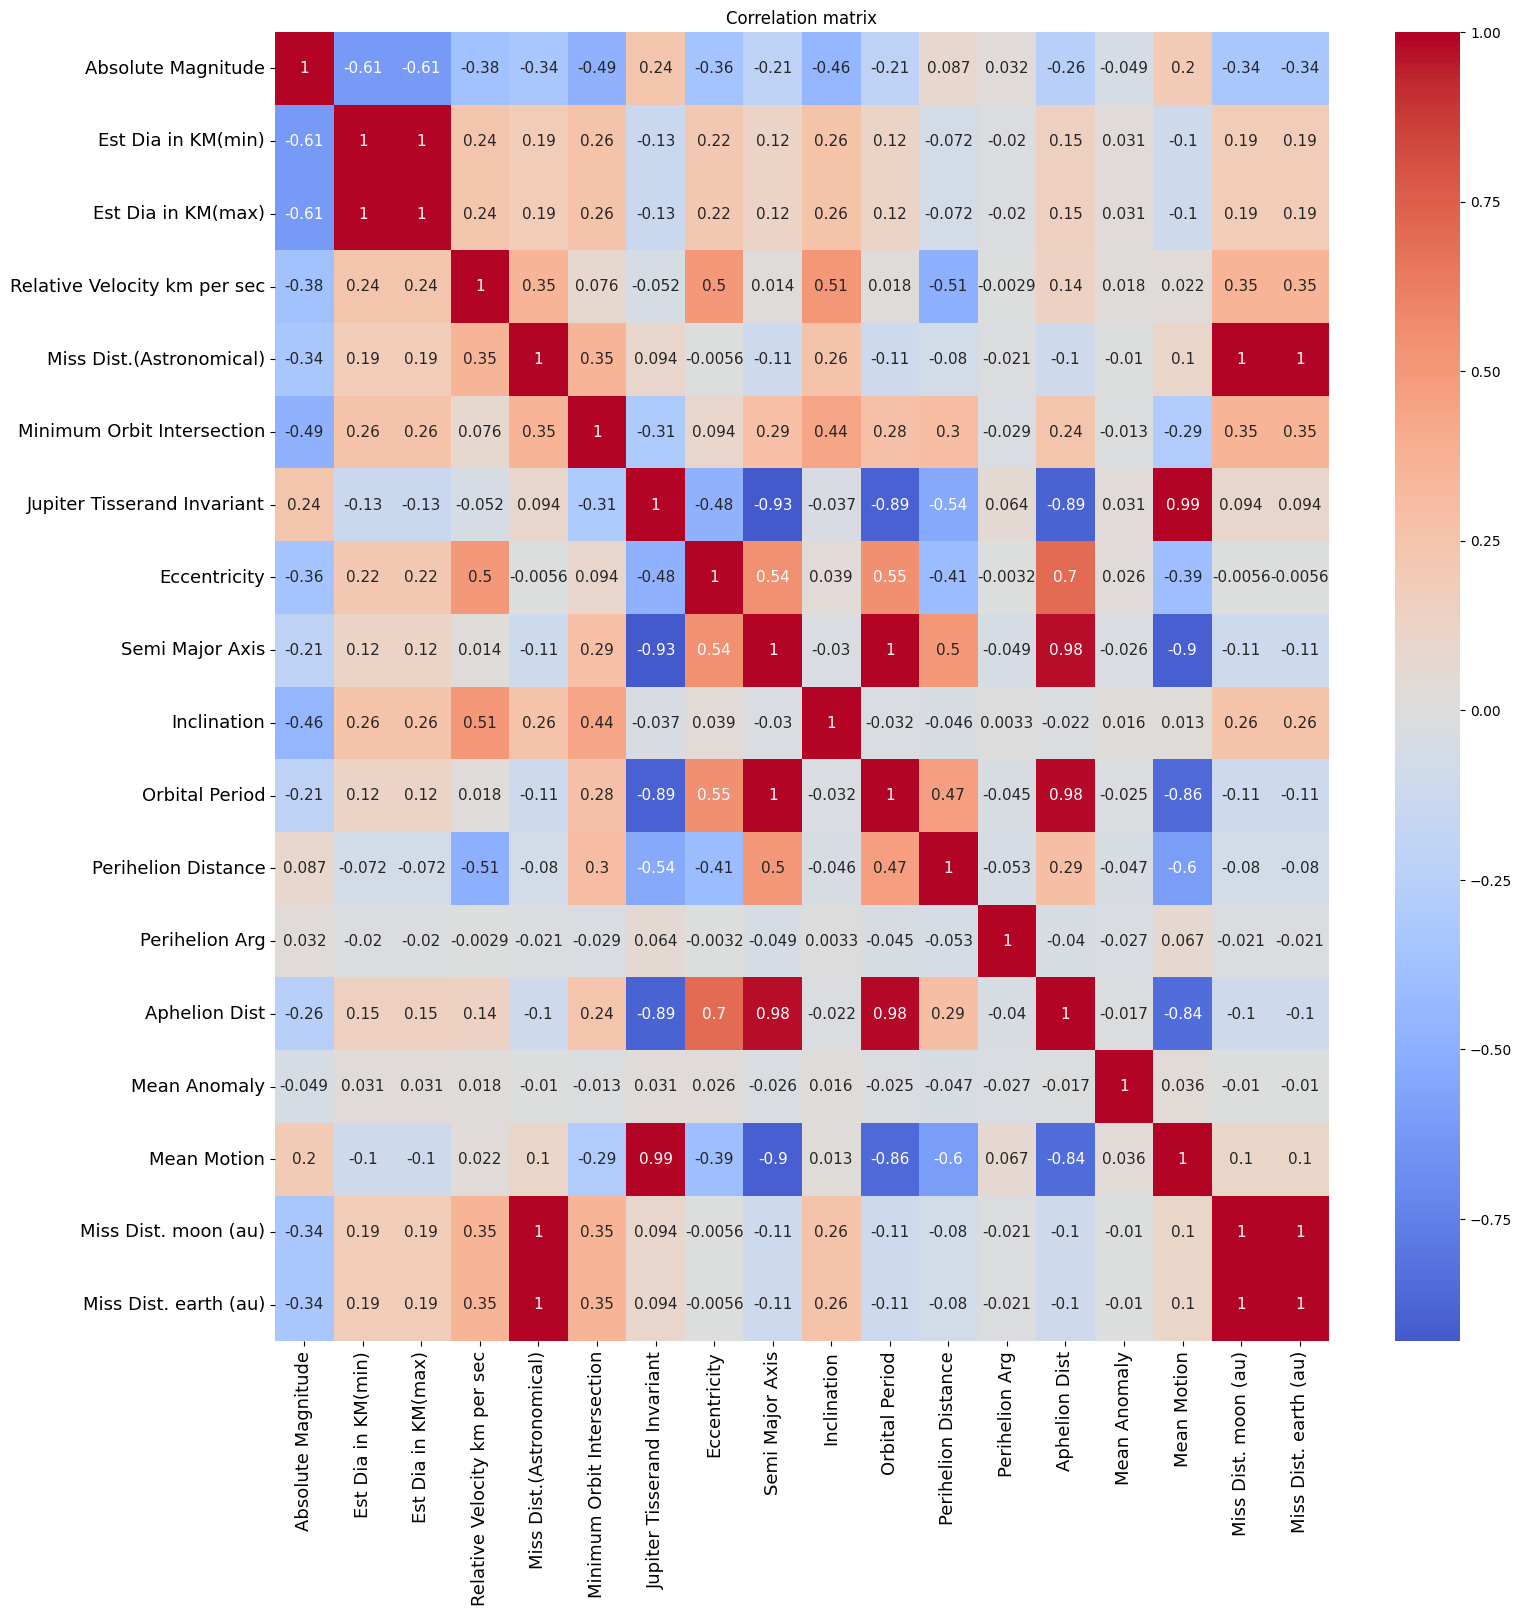

In [10]:
 cor_df = df2.drop (['Neo Reference ID','Name','Perihelion Time','Asc Node Longitude','Epoch Date Close Approach','Epoch Osculation','Close Approach Date','Orbit Determination Date','Orbiting Body','Orbit ID','Equinox','Hazardous', 'Orbit Uncertainity'], axis =1)
column_headers2 = list(cor_df.columns.values)
cor = cor_df.corr()
fig_h = plt.figure(figsize=(17, 17))
ax_h = fig_h.add_subplot(1, 1, 1)
sns.heatmap(cor,cmap='coolwarm', center=0, annot= True, annot_kws={'size':11})
ax_h.set_title('Correlation matrix')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In this section of the code we look at individual correaltions for different variables that we believe are important to look at. (e.g. Relative velocity and diameter for each NEO). 
The code will output a chart for each correaltion. You can also find underneath each chart the speciific correaltion expresed in percentage, for each set of variables.

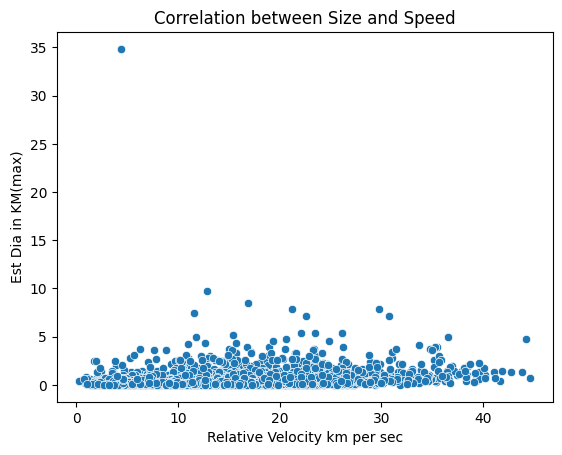

The correlation between Relative Velocity km per sec and Est Dia in KM(max) is 0.24214074876370462


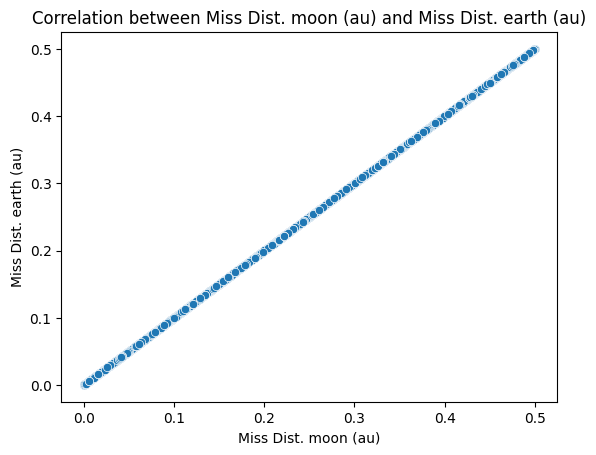

The correlation between Miss Dist. moon (au) and Miss Dist. earth (au) is 0.9999999999999971


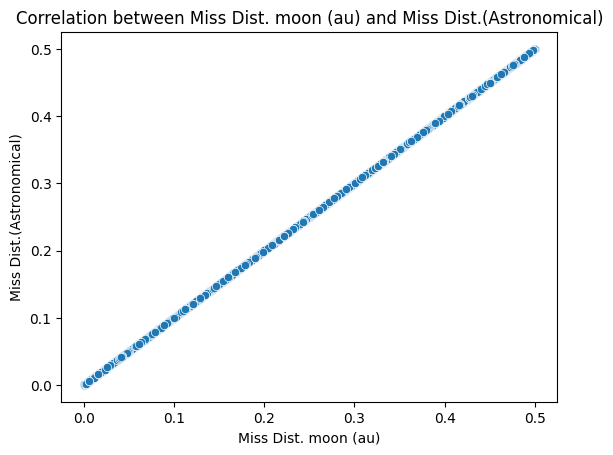

The correlation between Miss Dist. moon (au) km per sec and Miss Dist.(Astronomical) is 0.9999999999999977


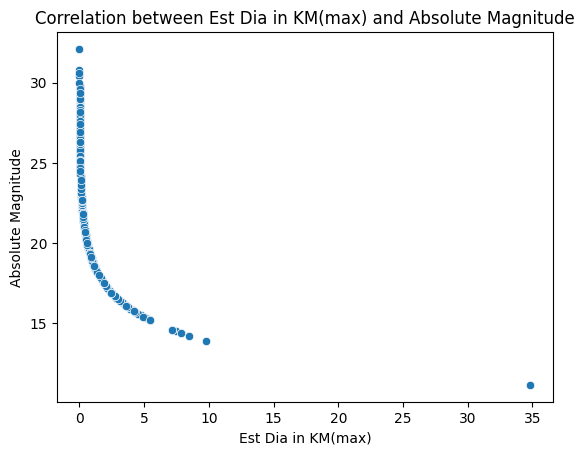

The correlation between Est Dia in KM(max)and Absolute Magnitude is -0.6134815101560878


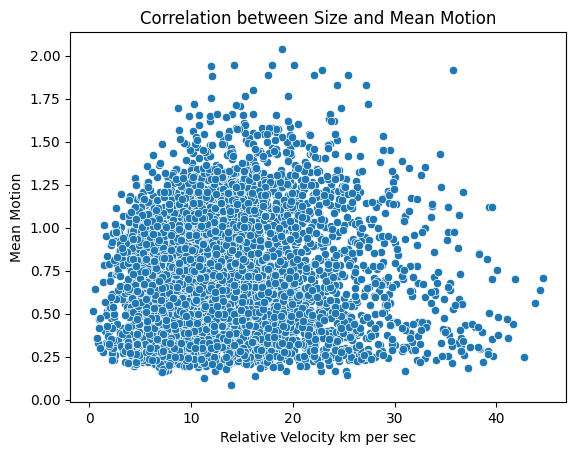

The correlation between Relative Velocity km per sec and Mean Motion is 0.022452465961918855


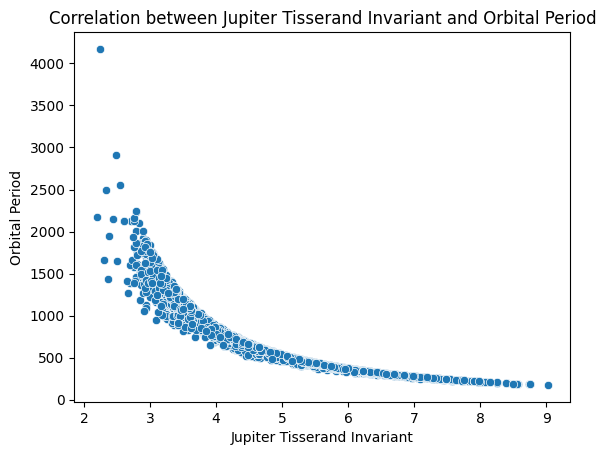

The correlation between Jupiter Tisserand Invariant and Orbital Periodis -0.8935173508969397


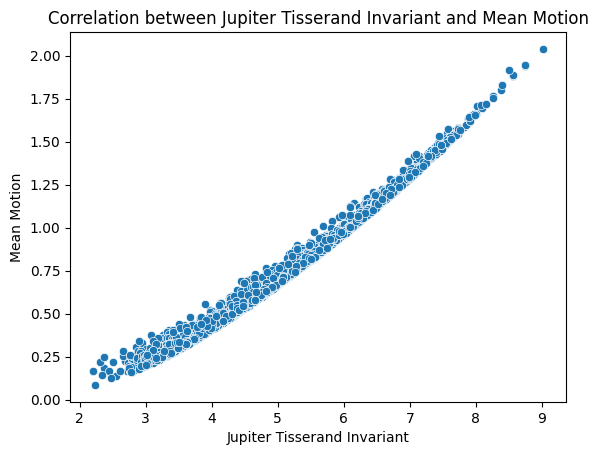

The correlation between Jupiter Tisserand Invariant and Mean Motion 0.9926803816891443


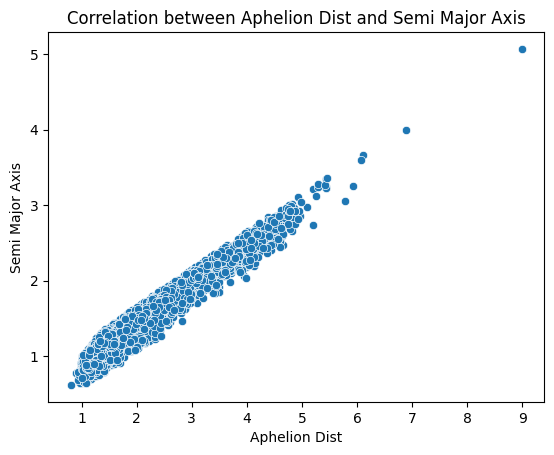

The correlation between Aphelion Dist and Semi Major Axis 0.9753256435648873


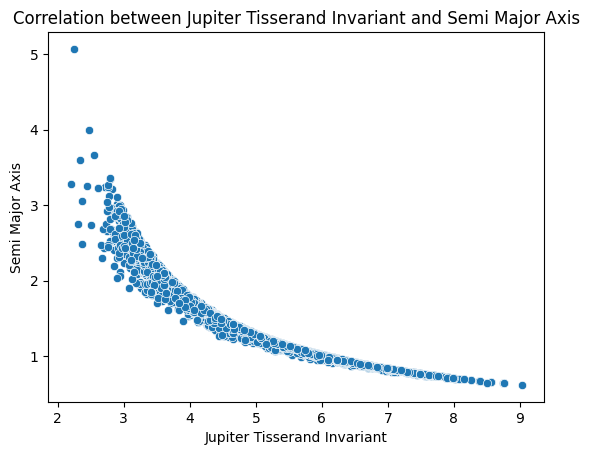

The correlation between Jupiter Tisserand Invariant and Semi Major Axis -0.9301025821702409


In [ ]:
# Check the correlation between size and speed
vd_corr= cor_df['Relative Velocity km per sec'].corr(cor_df['Est Dia in KM(max)'])
sns.scatterplot(x='Relative Velocity km per sec', y='Est Dia in KM(max)', data=cor_df)
plt.title('Correlation between Size and Speed')
plt.show()
print(f'The correlation between Relative Velocity km per sec and Est Dia in KM(max) is {vd_corr}')

me_corr= cor_df['Miss Dist. moon (au)'].corr(cor_df['Miss Dist. earth (au)'])
sns.scatterplot(x='Miss Dist. moon (au)', y='Miss Dist. earth (au)', data=cor_df)
plt.title('Correlation between Miss Dist. moon (au) and Miss Dist. earth (au)')
plt.show()
print(f'The correlation between Miss Dist. moon (au) and Miss Dist. earth (au) is {me_corr}')

mm_corr= cor_df['Miss Dist. moon (au)'].corr(cor_df['Miss Dist.(Astronomical)'])
sns.scatterplot(x='Miss Dist. moon (au)', y='Miss Dist.(Astronomical)', data=cor_df)
plt.title('Correlation between Miss Dist. moon (au) and Miss Dist.(Astronomical)')
plt.show()
print(f'The correlation between Miss Dist. moon (au) km per sec and Miss Dist.(Astronomical) is {mm_corr}')
#thus we will us only Miss Dist.(Astronomical)

md_corr= cor_df['Est Dia in KM(max)'].corr(cor_df['Absolute Magnitude'])
sns.scatterplot(x='Est Dia in KM(max)', y='Absolute Magnitude', data=cor_df)
plt.title('Correlation between Est Dia in KM(max) and Absolute Magnitude')
plt.show()
print(f'The correlation between Est Dia in KM(max)and Absolute Magnitude is {md_corr}')
# seems like the less size the more brightness STRANO

vm_corr= cor_df['Relative Velocity km per sec'].corr(cor_df['Mean Motion'])
sns.scatterplot(x='Relative Velocity km per sec', y='Mean Motion', data=cor_df)
plt.title('Correlation between Size and Mean Motion')
plt.show()
print(f'The correlation between Relative Velocity km per sec and Mean Motion is {vm_corr}')
#no corr


js_corr= cor_df['Jupiter Tisserand Invariant'].corr(cor_df['Orbital Period'])
sns.scatterplot(x='Jupiter Tisserand Invariant', y='Orbital Period', data=cor_df)
plt.title('Correlation between Jupiter Tisserand Invariant and Orbital Period')
plt.show()
print(f'The correlation between Jupiter Tisserand Invariant and Orbital Periodis {js_corr}')

jm_corr= cor_df['Jupiter Tisserand Invariant'].corr(cor_df['Mean Motion'])
sns.scatterplot(x='Jupiter Tisserand Invariant', y='Mean Motion', data=cor_df)
plt.title('Correlation between Jupiter Tisserand Invariant and Mean Motion')
plt.show()
print(f'The correlation between Jupiter Tisserand Invariant and Mean Motion {jm_corr}')


as_corr= cor_df['Aphelion Dist'].corr(cor_df['Semi Major Axis'])
sns.scatterplot(x='Aphelion Dist', y='Semi Major Axis', data=cor_df)
plt.title('Correlation between Aphelion Dist and Semi Major Axis')
plt.show()
print(f'The correlation between Aphelion Dist and Semi Major Axis {as_corr}')



jm_corr= cor_df['Jupiter Tisserand Invariant'].corr(cor_df['Semi Major Axis'])
sns.scatterplot(x='Jupiter Tisserand Invariant', y='Semi Major Axis', data=cor_df)
plt.title('Correlation between Jupiter Tisserand Invariant and Semi Major Axis')
plt.show()
print(f'The correlation between Jupiter Tisserand Invariant and Semi Major Axis {jm_corr}')


### Distributions

In this section, we will explore the different distributions for each variable in the dataset. They will be plotted using histograms to look for gaussianity, boxplots to look at outliers and also in numerical form to look at mean, standard deviation and other important statistics.
From the histograms we realized that mostly non of our variables are gaussianly distributed and we thus need to deal with them. 
From the boxplots isntead we found out that there are many outliers present and they might represent NEOs that could impact the Earth. 
We also plotted the distribution of the Response vairable (target) showing that the dataset is not balanced with a high percentage of objects not hitting the Earth.

       Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  \
count         4687.000000         4687.000000         4687.000000   
mean            22.267865            0.204604            0.457509   
std              2.890972            0.369573            0.826391   
min             11.160000            0.001011            0.002260   
25%             20.100000            0.033462            0.074824   
50%             21.900000            0.110804            0.247765   
75%             24.500000            0.253837            0.567597   
max             32.100000           15.579552           34.836938   

       Relative Velocity km per sec  Miss Dist.(Astronomical)  \
count                   4687.000000               4687.000000   
mean                      13.970811                  0.256778   
std                        7.293223                  0.145798   
min                        0.335504                  0.000178   
25%                        8.432865                  

<ipython-input-12-85805033a9f3>:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  cor_df.hist(ax=ax, bins=15)


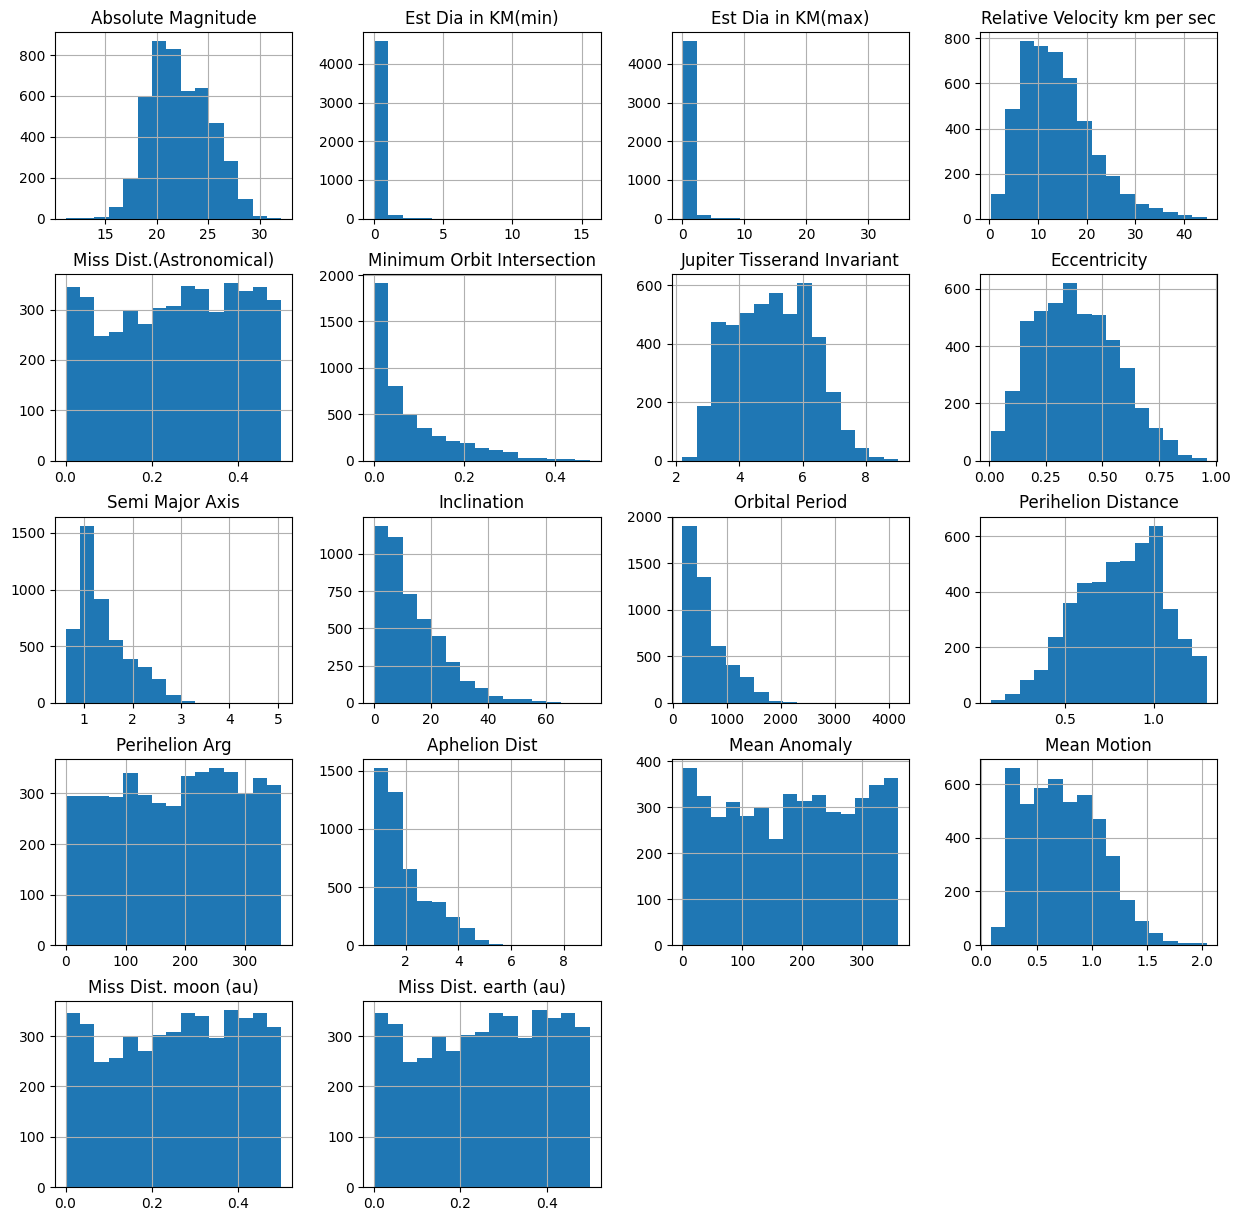

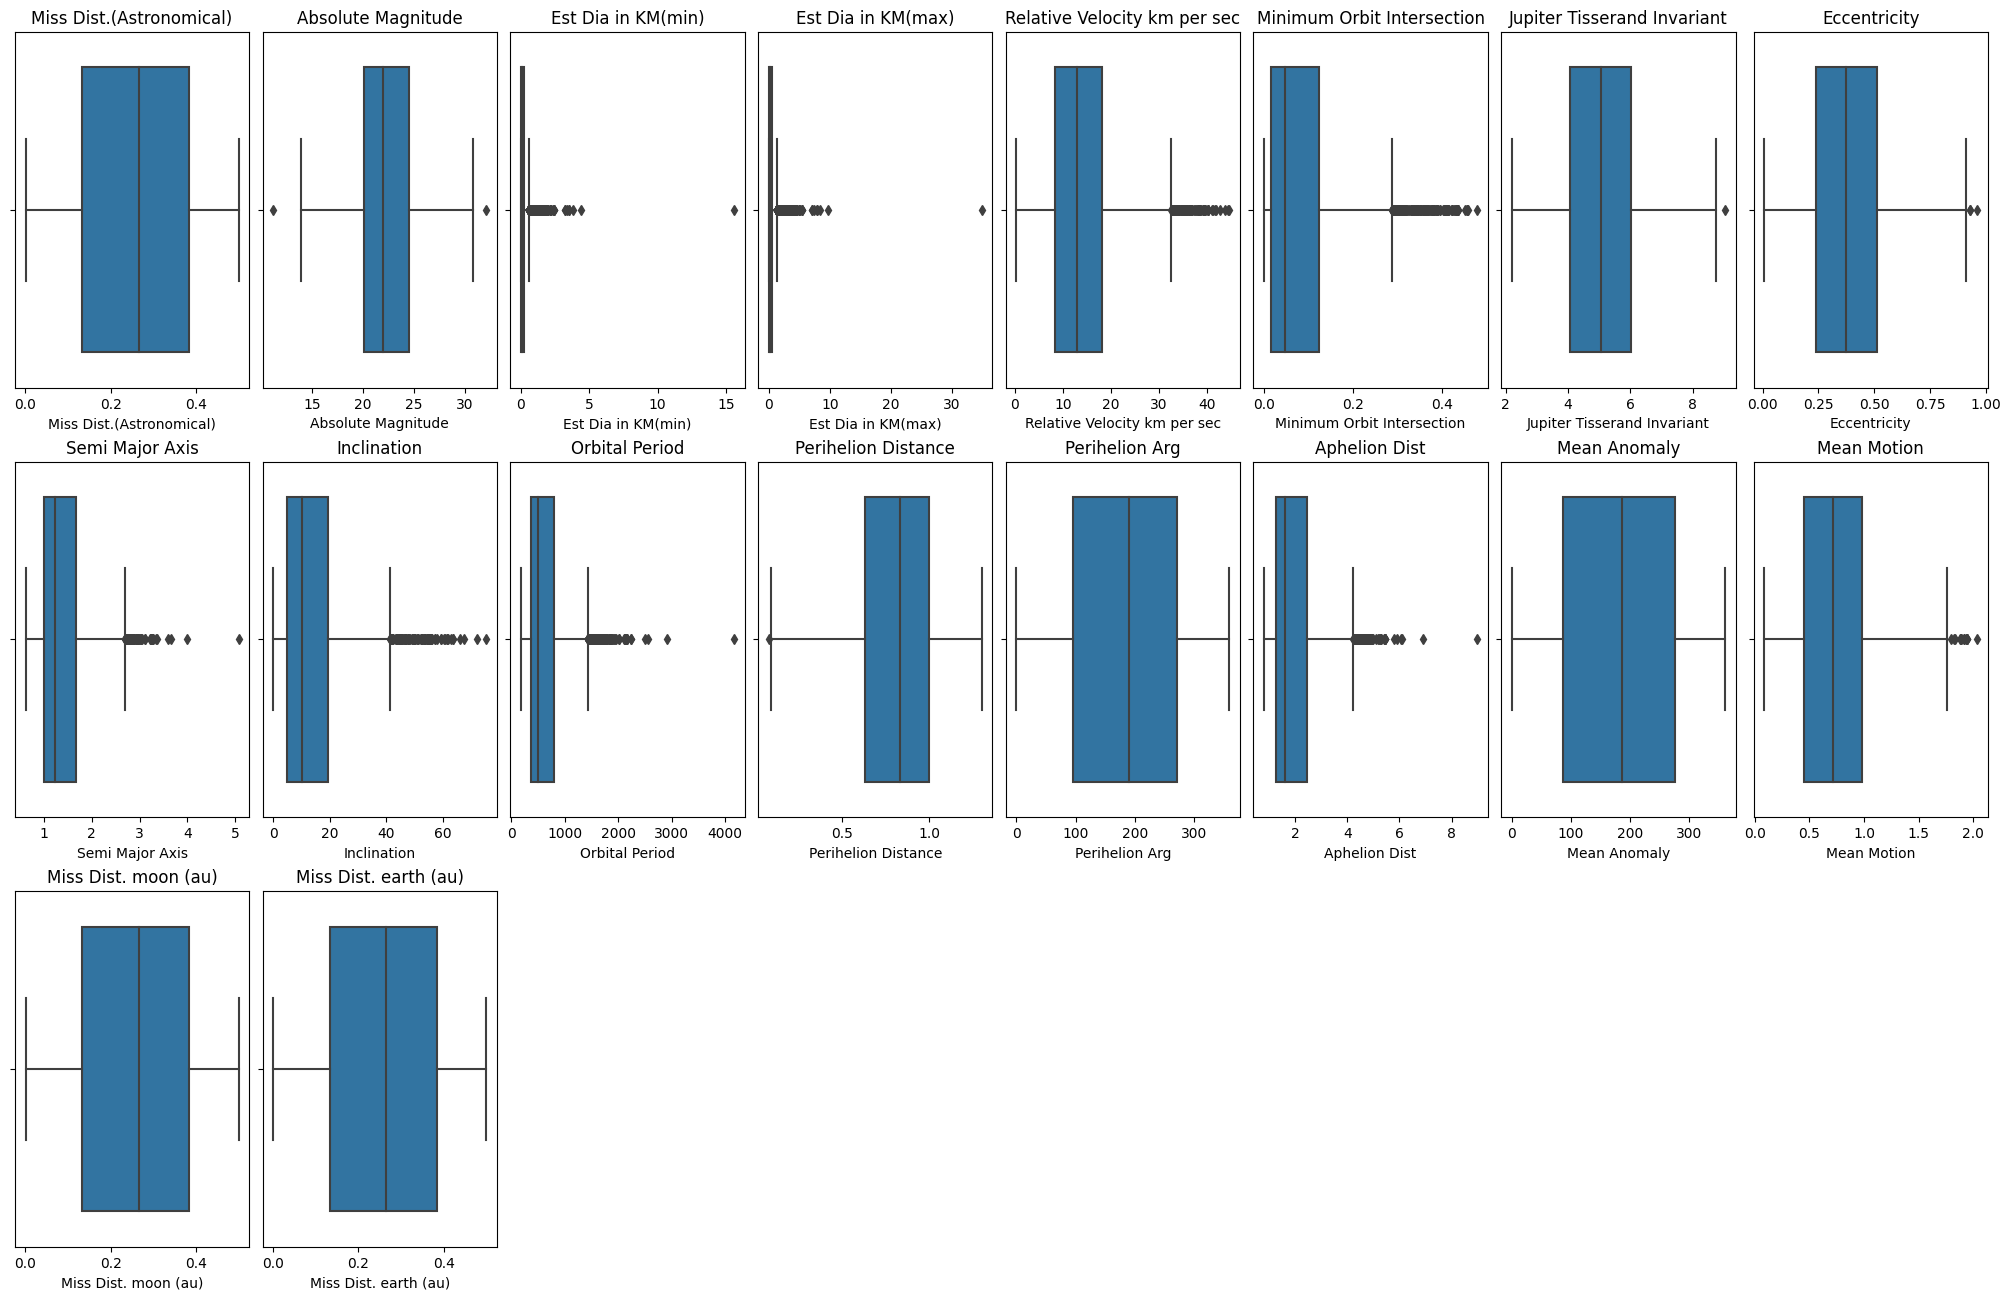

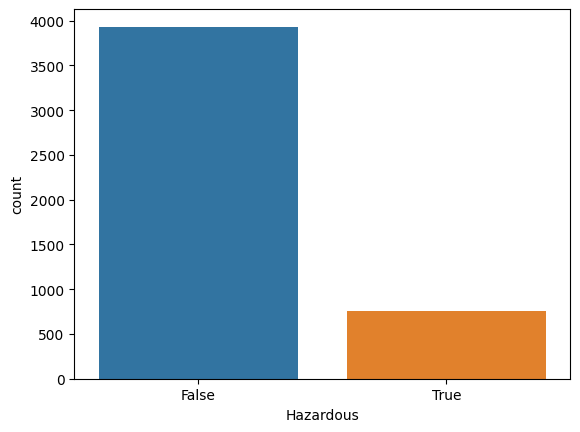

Total number of NEOs: 4687
Number of hazardous NEOs: 755
Percentage of hazardous NEOs: 16.11%


In [12]:
# Derving distribution info
tt=cor_df.describe()
print(tt)

# Histogram
fig, ax = plt.subplots(figsize=(15, 15))
cor_df.hist(ax=ax, bins=15)
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Asteroid Features')

# Boxplots
columns = [
    'Miss Dist.(Astronomical)', 'Absolute Magnitude', 'Est Dia in KM(min)',
    'Est Dia in KM(max)', 'Relative Velocity km per sec', 
    'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Eccentricity',
    'Semi Major Axis', 'Inclination', 'Orbital Period', 'Perihelion Distance',
    'Perihelion Arg', 'Aphelion Dist', 'Mean Anomaly', 'Mean Motion',
    'Miss Dist. moon (au)', 'Miss Dist. earth (au)'
]

def plot_boxplot(column):
    fig_ax = fig.add_subplot(gs[i, j])
    sns.boxplot(x=cor_df[column], ax=fig_ax)
    fig_ax.set_title(column)

fig = plt.figure(figsize=(20, 20), constrained_layout=True)
gs = fig.add_gridspec(5, 8)

for idx, col in enumerate(columns):
    i, j = divmod(idx, 8)
    plot_boxplot(col)
plt.show()


# Count the number of hazardous NEOs
num_hazardous = df['Hazardous'].sum()
num_hazardouss = df['Hazardous'].reset_index()
sns.countplot(data=num_hazardouss,x='Hazardous')
plt.show()
print(f'Total number of NEOs: {len(df)}')
print(f'Number of hazardous NEOs: {num_hazardous}')
print(f"Percentage of hazardous NEOs: {num_hazardous/len(df)*100:.2f}%")


##**CLASSIFICATION**
From now on we will focus on our models: we will start with a Logistic regression, then we will test a Random forest and lastly we will try to see how an ANN perfroms on our data.

### **Logistic Regression**

WE started classifying our NEOs using the simplest model possible, the logistic regression. As we have seen before, our dataset is far from balanced for the target variable, thus we started the process of classification with a Resampling


#### Resampling for Logistic Regression

The resampling for the logistic regression has been done using a DBScan clustering algorithm. In this way we splitted the data into clusters from each of which we retrieved some observations and put them together so to reach a balanced dataset composed exactly of 755 variables for each target class (hazardous or not-hazardous).
After the code you can find the chart showing that the dataset is now perfetcly balanced.


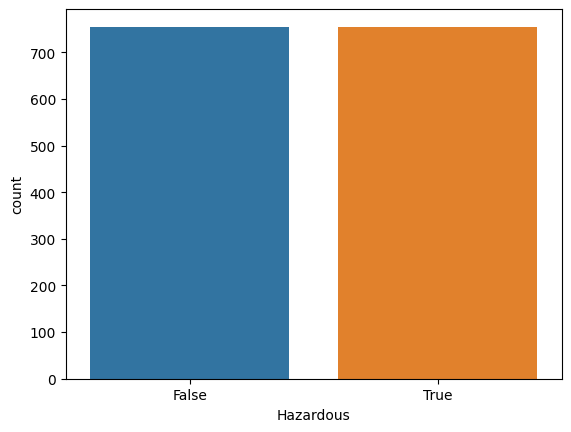

Total number of NEOs: 1510
Number of hazardous NEOs: 755
Percentage of hazardous NEOs: 50.00%


In [ ]:
df_false = df2[df2['Hazardous'] == False]


df_false = df_false.drop (['Neo Reference ID','Name','Perihelion Time','Asc Node Longitude','Epoch Date Close Approach','Epoch Osculation','Close Approach Date','Orbit Determination Date','Orbiting Body','Orbit ID','Equinox','Hazardous'], axis =1)

df_false['Est Dia in KM'] = (df_false['Est Dia in KM(min)']+df_false['Est Dia in KM(max)'])/2
df_false.drop('Est Dia in KM(min)', axis=1, inplace=True)
df_false.drop('Est Dia in KM(max)',axis=1, inplace=True)


# Preprocess the data by scaling the features
scaler = StandardScaler()
X_false = scaler.fit_transform(df_false.values)

# Fit the DBSCAN clustering algorithm to the preprocessed data
dbscan = DBSCAN(eps=1, min_samples=3, algorithm='ball_tree')
dbscan.fit(X_false)

# Extract the labels of the clusters
labels = dbscan.labels_

# Count the number of samples in each cluster
counts = np.bincount(labels[labels != -1])

# Select a subset of samples from each cluster to include in the final under-sampled dataset
samples_per_cluster = 100
selected_samples = []
for i in range(len(counts)):
    if counts[i] > samples_per_cluster:
        cluster_samples = df_false[labels == i].sample(samples_per_cluster)
    else:
        cluster_samples = df_false[labels == i]
    selected_samples.append(cluster_samples)
    
# Concatenate the selected samples into the final under-sampled dataset
under_sampled_df = pd.concat(selected_samples)
under_sampled_df['Hazardous'] = False

df_true = df2[df2['Hazardous'] == True]

df_true = df_true.drop (['Neo Reference ID','Name','Perihelion Time','Asc Node Longitude','Epoch Date Close Approach','Epoch Osculation','Close Approach Date','Orbit Determination Date','Orbiting Body','Orbit ID','Equinox'], axis =1)

df_true['Est Dia in KM'] = (df_true['Est Dia in KM(min)']+df_true['Est Dia in KM(max)'])/2
df_true.drop('Est Dia in KM(min)', axis=1, inplace=True)
df_true.drop('Est Dia in KM(max)',axis=1, inplace=True)


under_sampled_df=pd.concat([under_sampled_df, df_true], axis=0)


num_hazardous_under = under_sampled_df['Hazardous'].sum()
num_hazardouss_under = under_sampled_df['Hazardous'].reset_index()
sns.countplot(data=num_hazardouss_under,x='Hazardous')
plt.show()
print(f'Total number of NEOs: {len(under_sampled_df)}')
print(f'Number of hazardous NEOs: {num_hazardous_under}')
print(f"Percentage of hazardous NEOs: {num_hazardous_under/len(under_sampled_df)*100:.2f}%")


#### Training the Model

In this section of the code we prepare the dataset for the training of the logistic regression model. 

First we split the dataset into response and not, also we create a new dataset that we will use to test our logistic regression on an unbalanced dataset. (lr_df1).

In [ ]:
#This cell is aimed to prepare the datasets for the analysis
response1= under_sampled_df.iloc[:,-1]
df_log_reg = under_sampled_df.iloc[: , :-1]


lr_df1=cor_df
lr_df1['Est Dia in KM'] = (cor_df['Est Dia in KM(min)']+cor_df['Est Dia in KM(max)'])/2
lr_df1.drop('Est Dia in KM(min)', axis=1, inplace=True)
lr_df1.drop('Est Dia in KM(max)',axis=1, inplace=True)


Now we start training our model. We stard by splitting the df_log_reg and the response1 df into train and test (80-20). 

Then we check for overlapping indices. This is fundamental for the testing on the unbalanced dataset since we need to remove from it the rows that we use in the training phase of the model. Remember that the unbalanced dataset, will not be split into training or test, we use all of it for testing without the observations already present in the balanced dataset used for training. 

Then we scaled the different dataset, x_train and x_test are the balanced datasets, while x_test_tot is the unbalanced test data. 

Lastly we initialized the lgotistic regression model with no penalty. We decided to use no penalty since its the first model and we wanted to make it as simple as possible.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_log_reg, response1, test_size=0.20, random_state=0)
scaler = StandardScaler()

# get the indices of the rows in lr_df1 that also appear in df_log_reg
overlap_indices = lr_df1.index.intersection(x_train.index)

# drop the overlapping rows from lr_df1
x_test_tot = lr_df1.drop(overlap_indices)
y_test_tot= target.drop(overlap_indices)


scaled_train = scaler.fit_transform(x_train)
scaled_test = scaler.transform(x_test_tot)
scaled_test_bal =scaler.transform(x_test)

logisticRegr = LogisticRegression(random_state=2409,penalty= 'none')
logisticRegr.fit(scaled_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none', random_state=2409)

#### Assessing perfromance

In this section we will analyze the model performance on the balanced dataset.

We plot and look at different metrics to understand the performance of our model on the balanced dataset. 
You can find them all underneath the code, starting with a confusion matrix, then with some statistics (accuracy, recall, F1...) and lastly with the ROC and the AUC.

All the metrics tell us that the model, even if very simple, prefroms very good on a perfectly balanced dataset. We will use F1 and AUC to compare the three different Machine Learning models. 

Score for balanced dataset0.9668874172185431


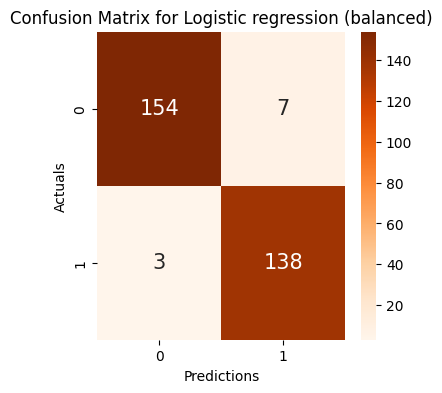

Logistic regression precision (balanced): 0.9517241379310345
Logistic regression specificity (balanced): 0.9565217391304348
Logistic regression accuracy (balanced): 0.9668874172185431
Logistic regression recall (balanced): 0.9787234042553191
Logistic regression F-1 score (balanced): 0.965034965034965


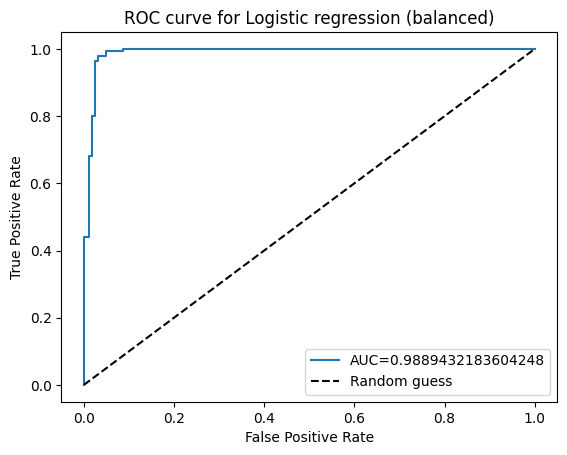

In [ ]:
predictions_bal=logisticRegr.predict(scaled_test_bal)
score_bal= logisticRegr.score(scaled_test_bal, y_test)
print(f'Score for balanced dataset{score_bal}')


cm_bal = metrics.confusion_matrix(y_test, predictions_bal)
# Build the plot
plt.figure(figsize=(4,4))
sns.heatmap(cm_bal, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Oranges,  fmt='.3g')
plt.title('Confusion Matrix for Logistic regression (balanced)')
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.show()

precision_lr_bal =precision_score(y_test, predictions_bal)
print('Logistic regression precision (balanced):', precision_lr_bal)

specificity_lr_bal= specificity_score(y_test, predictions_bal)
print('Logistic regression specificity (balanced):', specificity_lr_bal)

accuracy_lr_bal=accuracy_score(y_test, predictions_bal)
print('Logistic regression accuracy (balanced):', accuracy_lr_bal)

recall_lr_bal=recall_score(y_test, predictions_bal)
print('Logistic regression recall (balanced):', recall_lr_bal)

fi_lr_bal=f1_score(y_test, predictions_bal)
print('Logistic regression F-1 score (balanced):', fi_lr_bal)



y_pred_proba_bal = logisticRegr.predict_proba(scaled_test_bal)[::,1]
fpr_bal, tpr_bal, _= metrics.roc_curve(y_test,  y_pred_proba_bal)
auc_bal = metrics.roc_auc_score(y_test, y_pred_proba_bal)

#create ROC curve
plt.plot(fpr_bal,tpr_bal,label="AUC="+str(auc_bal))
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC curve for Logistic regression (balanced)')
plt.show()

Lastly we assessed the performance of the model on the real dataset (unbalcned one). We plotted the same metrics as above, and it is clear how a logistic regression model does not perform well on an unbalanced dataset. This is clear from the F1 score which is very low compared to the one on balanced data, and from the AUC which even if less apparant, its still smaller than te previous one.

Score for unbalanced dataset0.870939925265881


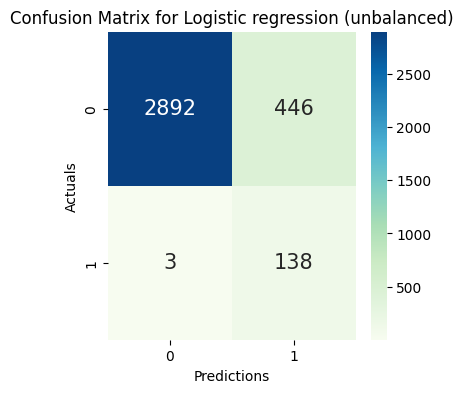

Logistic regression precision (unbalanced): 0.2363013698630137
Logistic regression specificity (unbalanced): 0.8663870581186339
Logistic regression accuracy (unbalanced): 0.870939925265881
Logistic regression recall (unbalanced): 0.9787234042553191
Logistic regression F-1 score (unbalanced): 0.38068965517241377


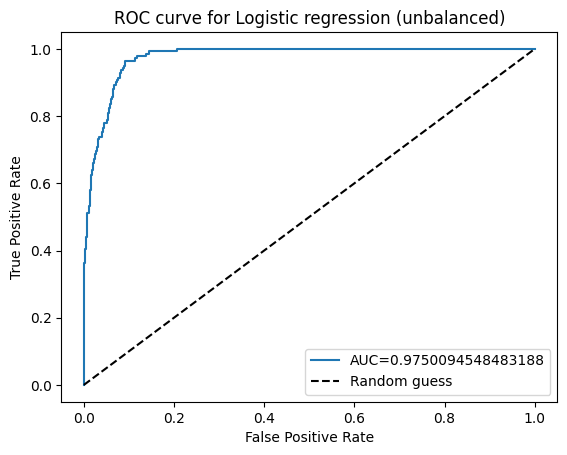

In [ ]:
predictions = logisticRegr.predict(scaled_test)
score = logisticRegr.score(scaled_test, y_test_tot)
print(f'Score for unbalanced dataset{score}')


cm = metrics.confusion_matrix(y_test_tot, predictions)
# Build the plot
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, annot_kws={'size':15},
            cmap=plt.cm.GnBu,  fmt='.4g')
plt.title('Confusion Matrix for Logistic regression (unbalanced)')
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.show()


precision_lr =precision_score(y_test_tot, predictions)
print('Logistic regression precision (unbalanced):', precision_lr)

specificity_lr= specificity_score(y_test_tot, predictions)
print('Logistic regression specificity (unbalanced):', specificity_lr)

accuracy_lr=accuracy_score(y_test_tot, predictions)
print('Logistic regression accuracy (unbalanced):', accuracy_lr)

recall_lr=recall_score(y_test_tot, predictions)
print('Logistic regression recall (unbalanced):', recall_lr)

fi_lr=f1_score(y_test_tot, predictions)
print('Logistic regression F-1 score (unbalanced):', fi_lr)


y_pred_proba = logisticRegr.predict_proba(scaled_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_tot,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_tot, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC curve for Logistic regression (unbalanced)')
plt.show()



#### Pameter importance

This section has been used to understand parameter importance and signidficance on the logistic regression. 
They are ordered from 1 to 18 as they appear in the dataset and on the right of the table you can see if the variable is significant or not. (E.g. x1 = absolute magnitude, is significant)

You can also find the odds Ratios and pvalues for each variable.

In [ ]:
model = sm.Logit(y_train, scaled_train).fit()
params = model.params
conf = model.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
# convert log odds to ORs
odds = pd.DataFrame(np.exp(conf))
# check if pvalues are significant
odds['pvalues'] = model.pvalues
odds['significant?'] = ['significant' if pval <= 0.05 else 'not significant' for pval in model.pvalues]
odds

         Current function value: 0.083930
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


2.5%         97.5%    Odds Ratio       pvalues     significant?
x1   3.155310e-04  5.825838e-03  1.355814e-03  6.845492e-19      significant
x2   1.804305e+00  1.051243e+01  4.355185e+00  1.065462e-03      significant
x3   0.000000e+00           inf  1.770546e-37  9.999808e-01  not significant
x4   3.350756e-01  1.084910e+00  6.029318e-01  9.140011e-02  not significant
x5   1.782153e-03  2.396448e-02  6.535164e-03  3.247812e-14      significant
x6   8.121680e+02  3.591726e+16  5.401004e+09  5.177060e-03      significant
x7   1.930467e-01  9.055550e+00  1.322174e+00  7.760404e-01  not significant
x8   0.000000e+00           inf  2.015626e+01  9.999998e-01  not significant
x9   4.942356e-01  2.684544e+00  1.151867e+00  7.432891e-01  not significant
x10  2.754636e-12  1.792121e+09  7.026124e-02  8.280472e-01  not significant
x11  0.000000e+00           inf  1.201890e+00  9.999999e-01  not significant
x12  6.950560e-01  1.541571e+00  1.035122e+00  8.651103e-01  not significant
x13  0.000000e+00           inf  2.412068e+01  9.999998e-01  not significant
x14  1.051653e+00  2.426355e+00  1.597399e+00  2.808427e-02      significant
x15  4.391807e-14  4.087983e-04  4.237173e-09  9.934457e-04      significant
x16  0.000000e+00           inf  1.323124e+16  9.999928e-01  not significant
x17  0.000000e+00           inf  3.341519e+20  9.999895e-01  not significant
x18  5.692982e-01  7.304492e+00  2.039224e+00  2.736961e-01  not significant

###Random Forest

We will now move onto the Random Forest. 
This is more complex model and we beleive that it will perform much better compared to the Logistic Regression. 

We also believe is a much better model since it is trained and tested only on the real dataset (unbalanced) without the need to resample it first. 

We start by splitting it (80-20), then we initialized the model with some parameters we obtained running a grid search (you cna find it later on the code). 

To assess the perfromance we have used the same metrics as above.

It is clear how the Random Forest performs better than both the logistic on the unbalanced dataset and on the balanced one, with an F1 score 0.983 compared to 0.96 (balanced lr) and 0.38 (unbalanced). 
Also the AUC is better than both. 

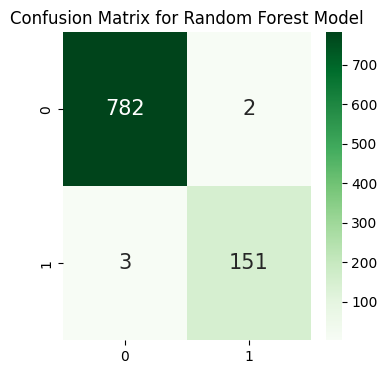

Random forest accuracy: 0.9946695095948828
Random forest precision: 0.9869281045751634
Random forest recall: 0.9805194805194806
Random forest F-1 score: 0.9837133550488599
RAndom forest specificity: 0.9974489795918368


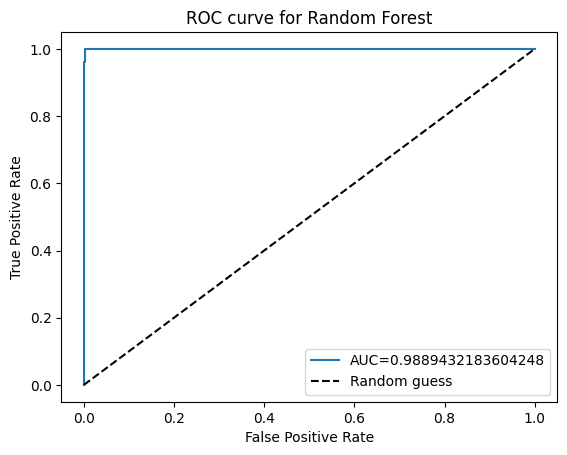

In [ ]:

x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(lr_df1, target, test_size=0.20, random_state=2409)

rf = RandomForestClassifier(n_estimators=40, max_depth=8,max_features=3,min_samples_leaf=1, min_samples_split=6,random_state= 2409).fit(x_train_rf, y_train_rf)

rf_pred = rf.predict(x_test_rf)



rf_cm = metrics.confusion_matrix(y_test_rf, rf_pred)

# Build the plot
plt.figure(figsize=(4,4))
sns.heatmap(rf_cm, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Greens, fmt='.3g')


plt.title('Confusion Matrix for Random Forest Model')
plt.show()


rf_accuracy =accuracy_score(y_test_rf, rf_pred)
print('Random forest accuracy:', rf_accuracy)

precision_rf= precision_score(y_test_rf, rf_pred)
print('Random forest precision:', precision_rf)

recall_rf = recall_score(y_test_rf, rf_pred)
print('Random forest recall:', recall_rf)

f1_rf= f1_score(y_test_rf, rf_pred)
print('Random forest F-1 score:', f1_rf)

specificity_rf= specificity_score(y_test_rf, rf_pred)
print('RAndom forest specificity:', specificity_rf)


y_pred_proba_rf = rf.predict_proba(x_test_rf)[:, 1]
auc_rf = metrics.roc_auc_score(y_test_rf, y_pred_proba_rf)

# calculate ROC curve of the model
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test_rf, y_pred_proba_rf)
#create ROC curve
plt.plot(fpr_rf,tpr_rf,label="AUC="+str(auc_bal))
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC curve for Random Forest')
plt.show()


#### Plotting a decision tree

We also wanted to plot some decision trees to see which variables impact the most the random forest.

You can have a look at them after this chunck of code.

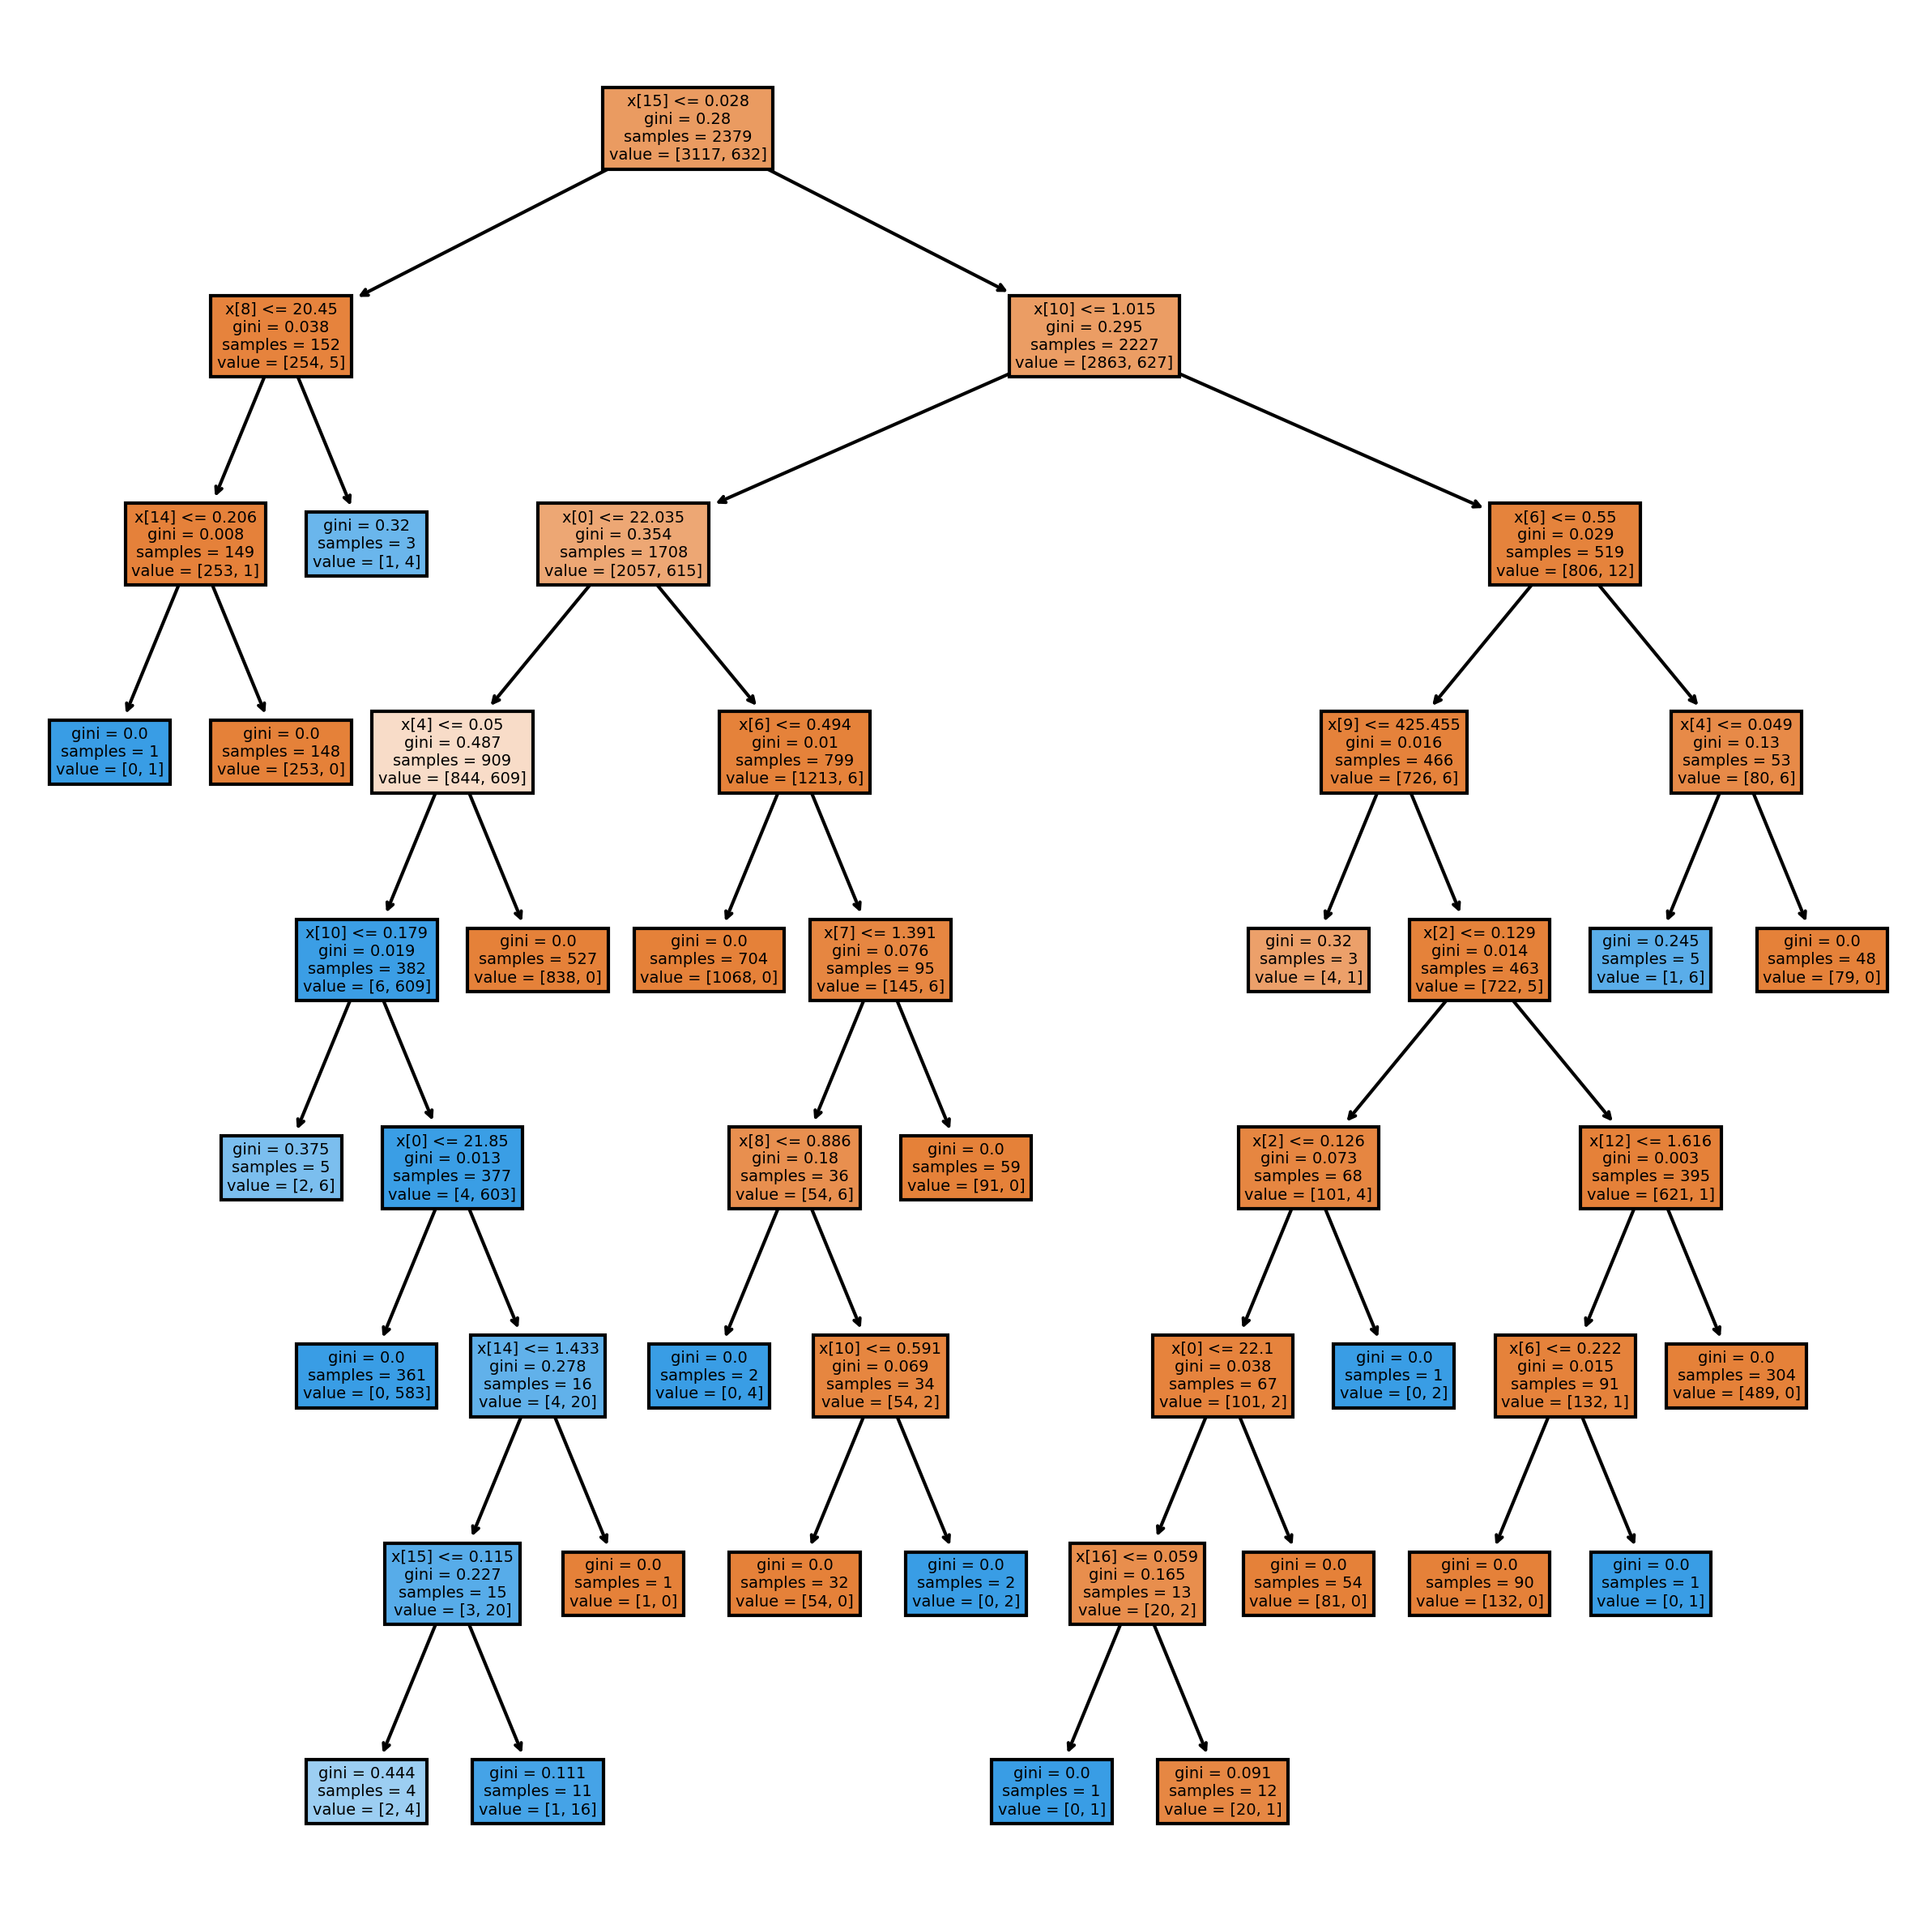

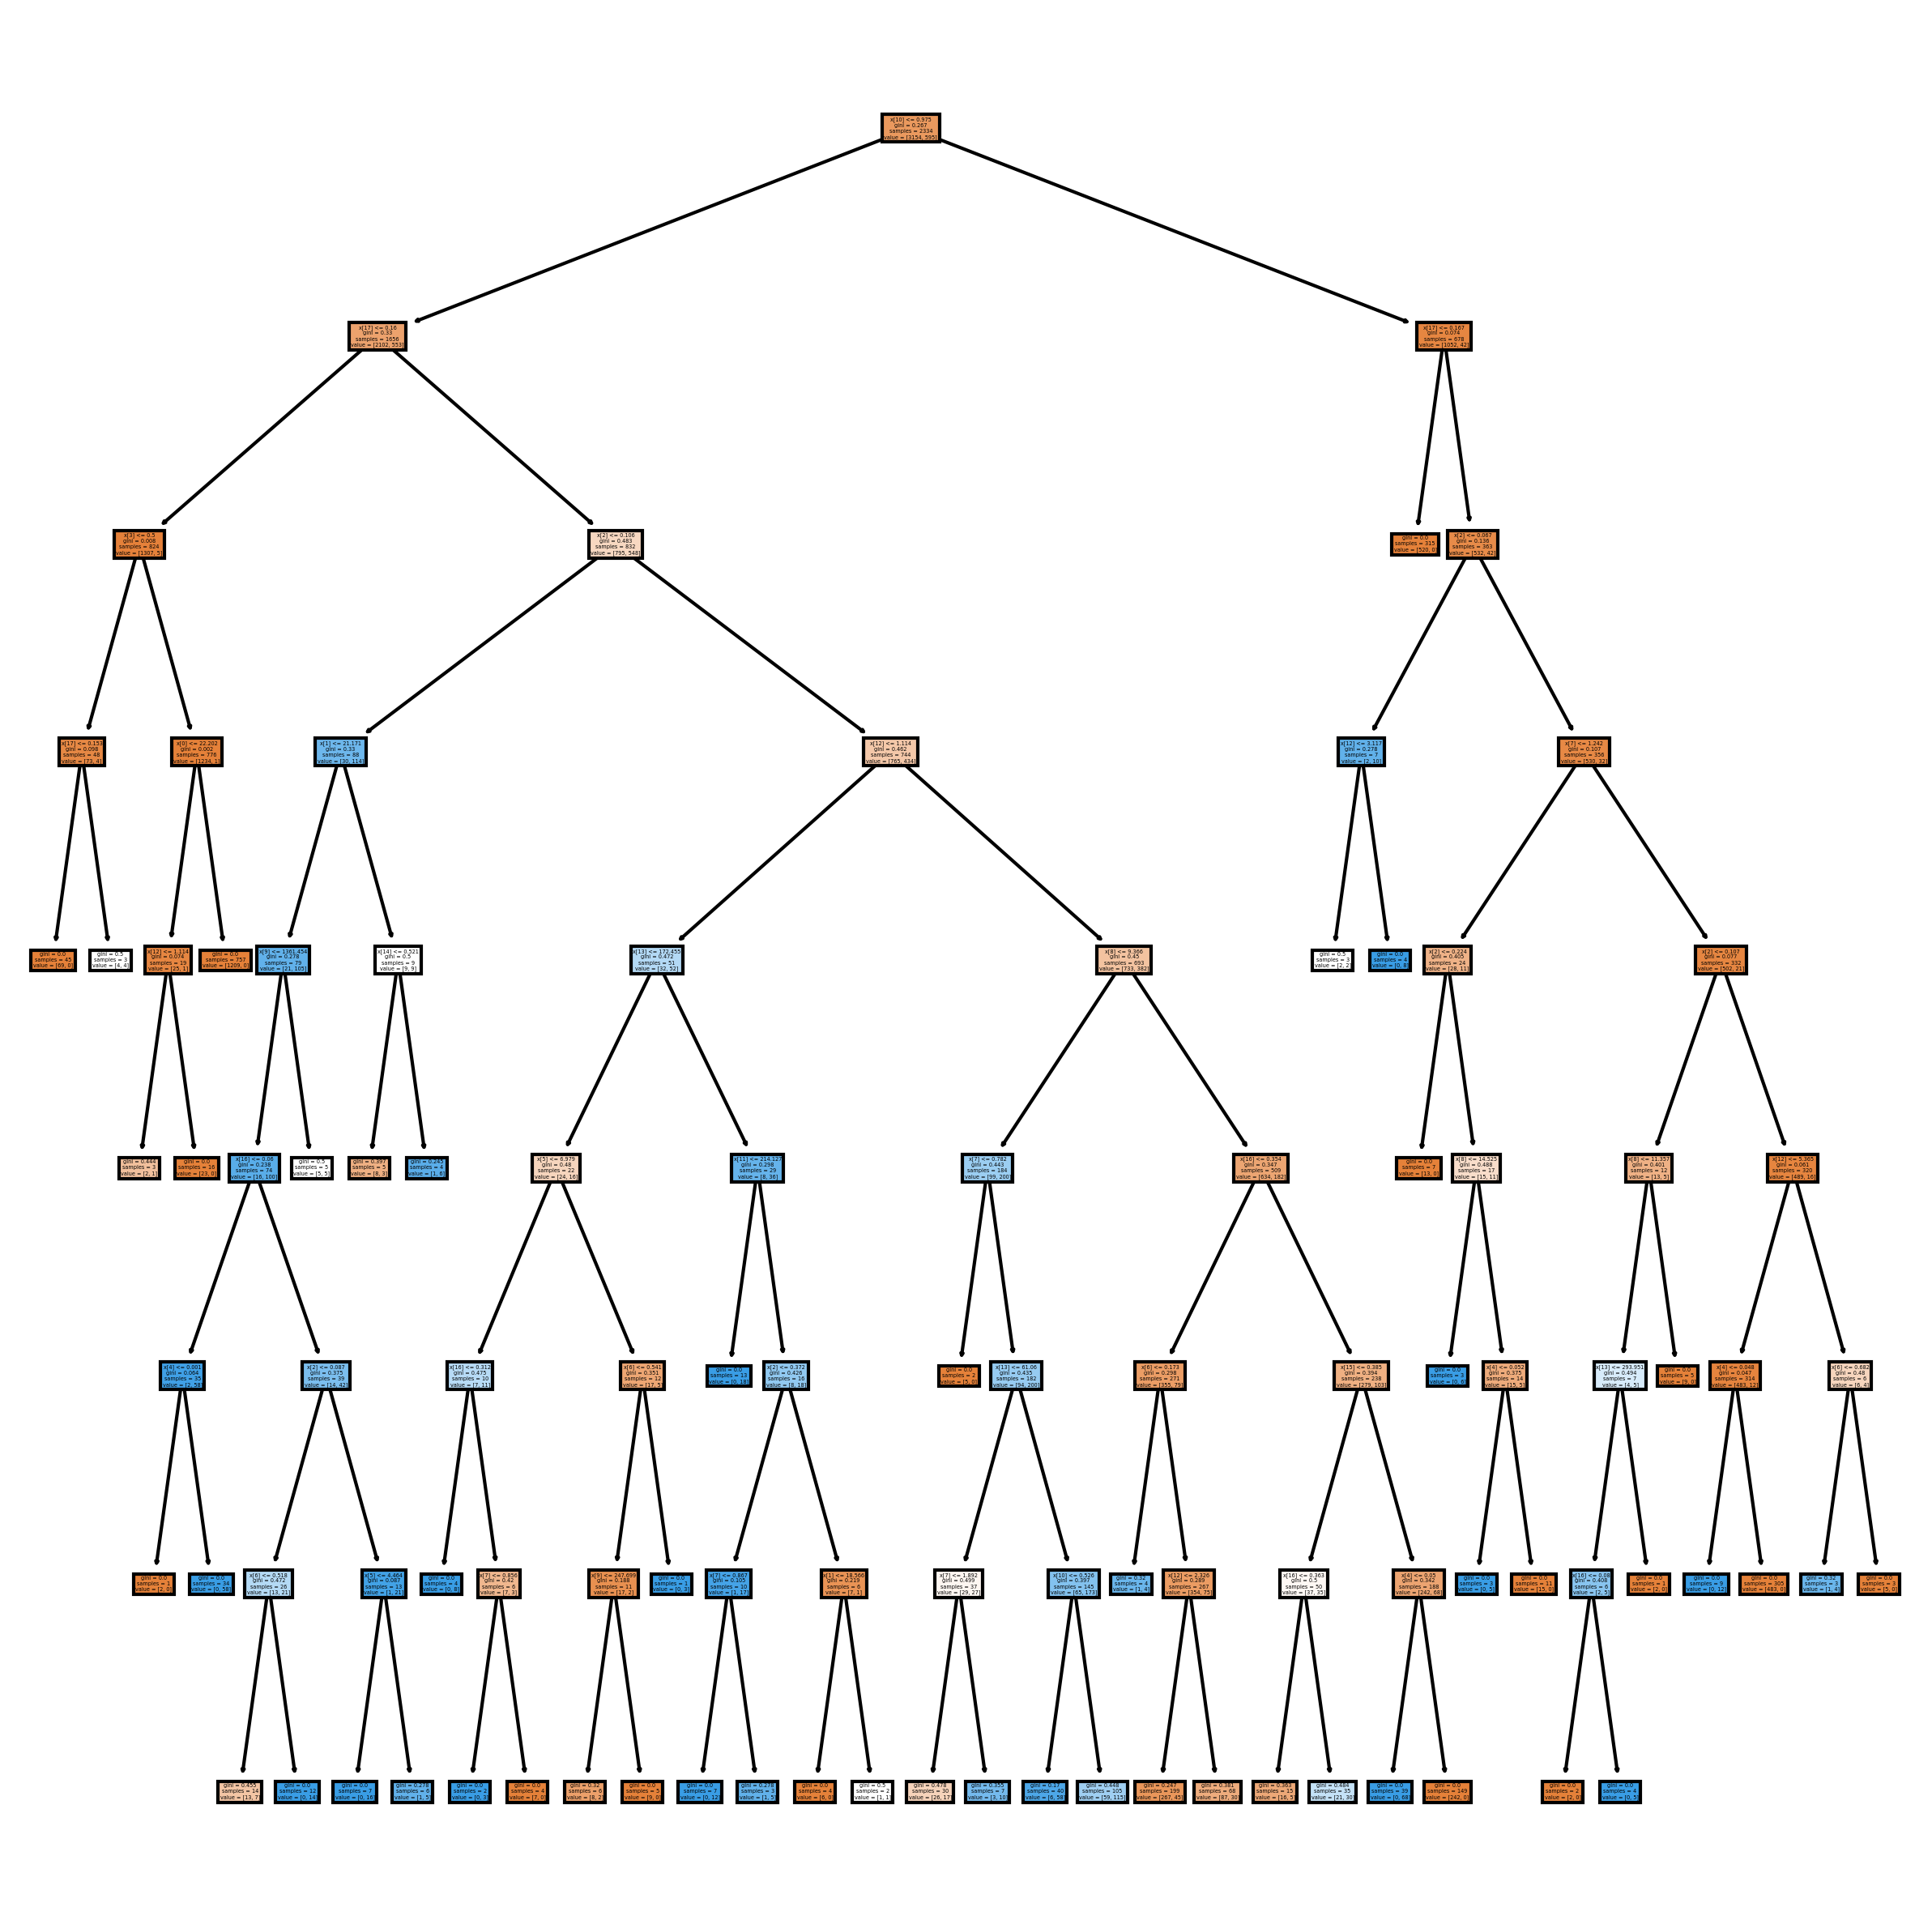

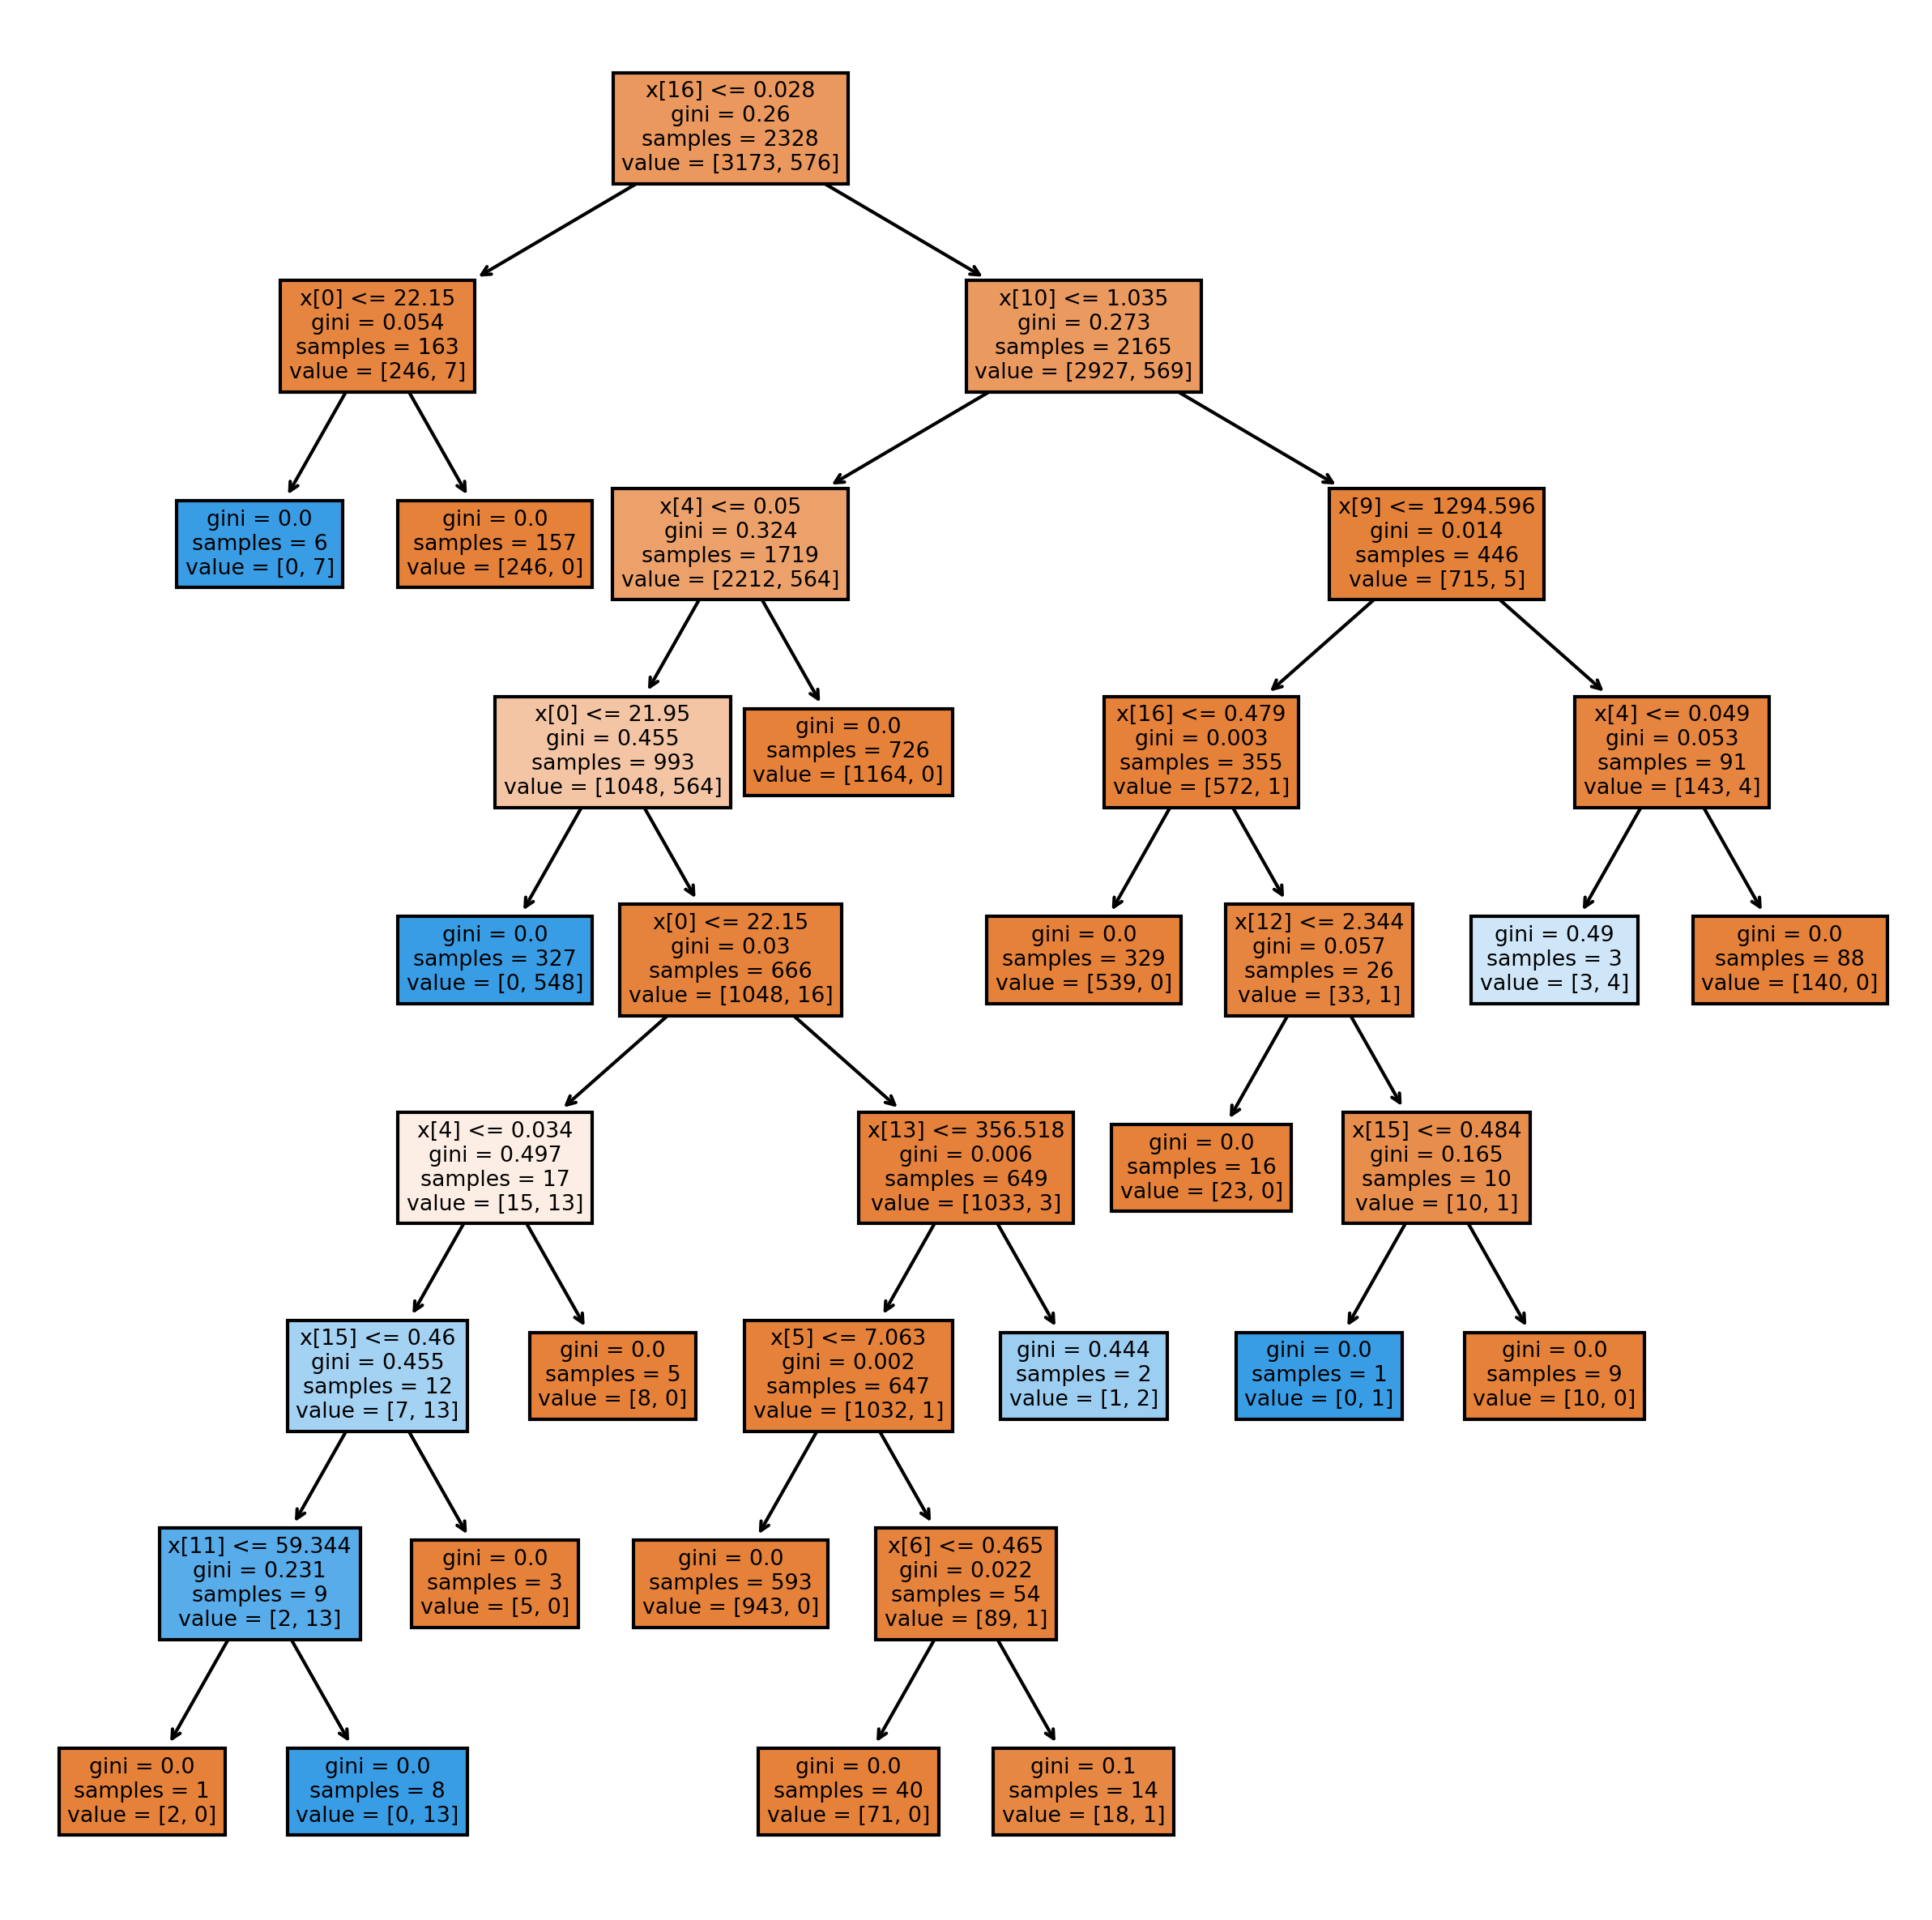

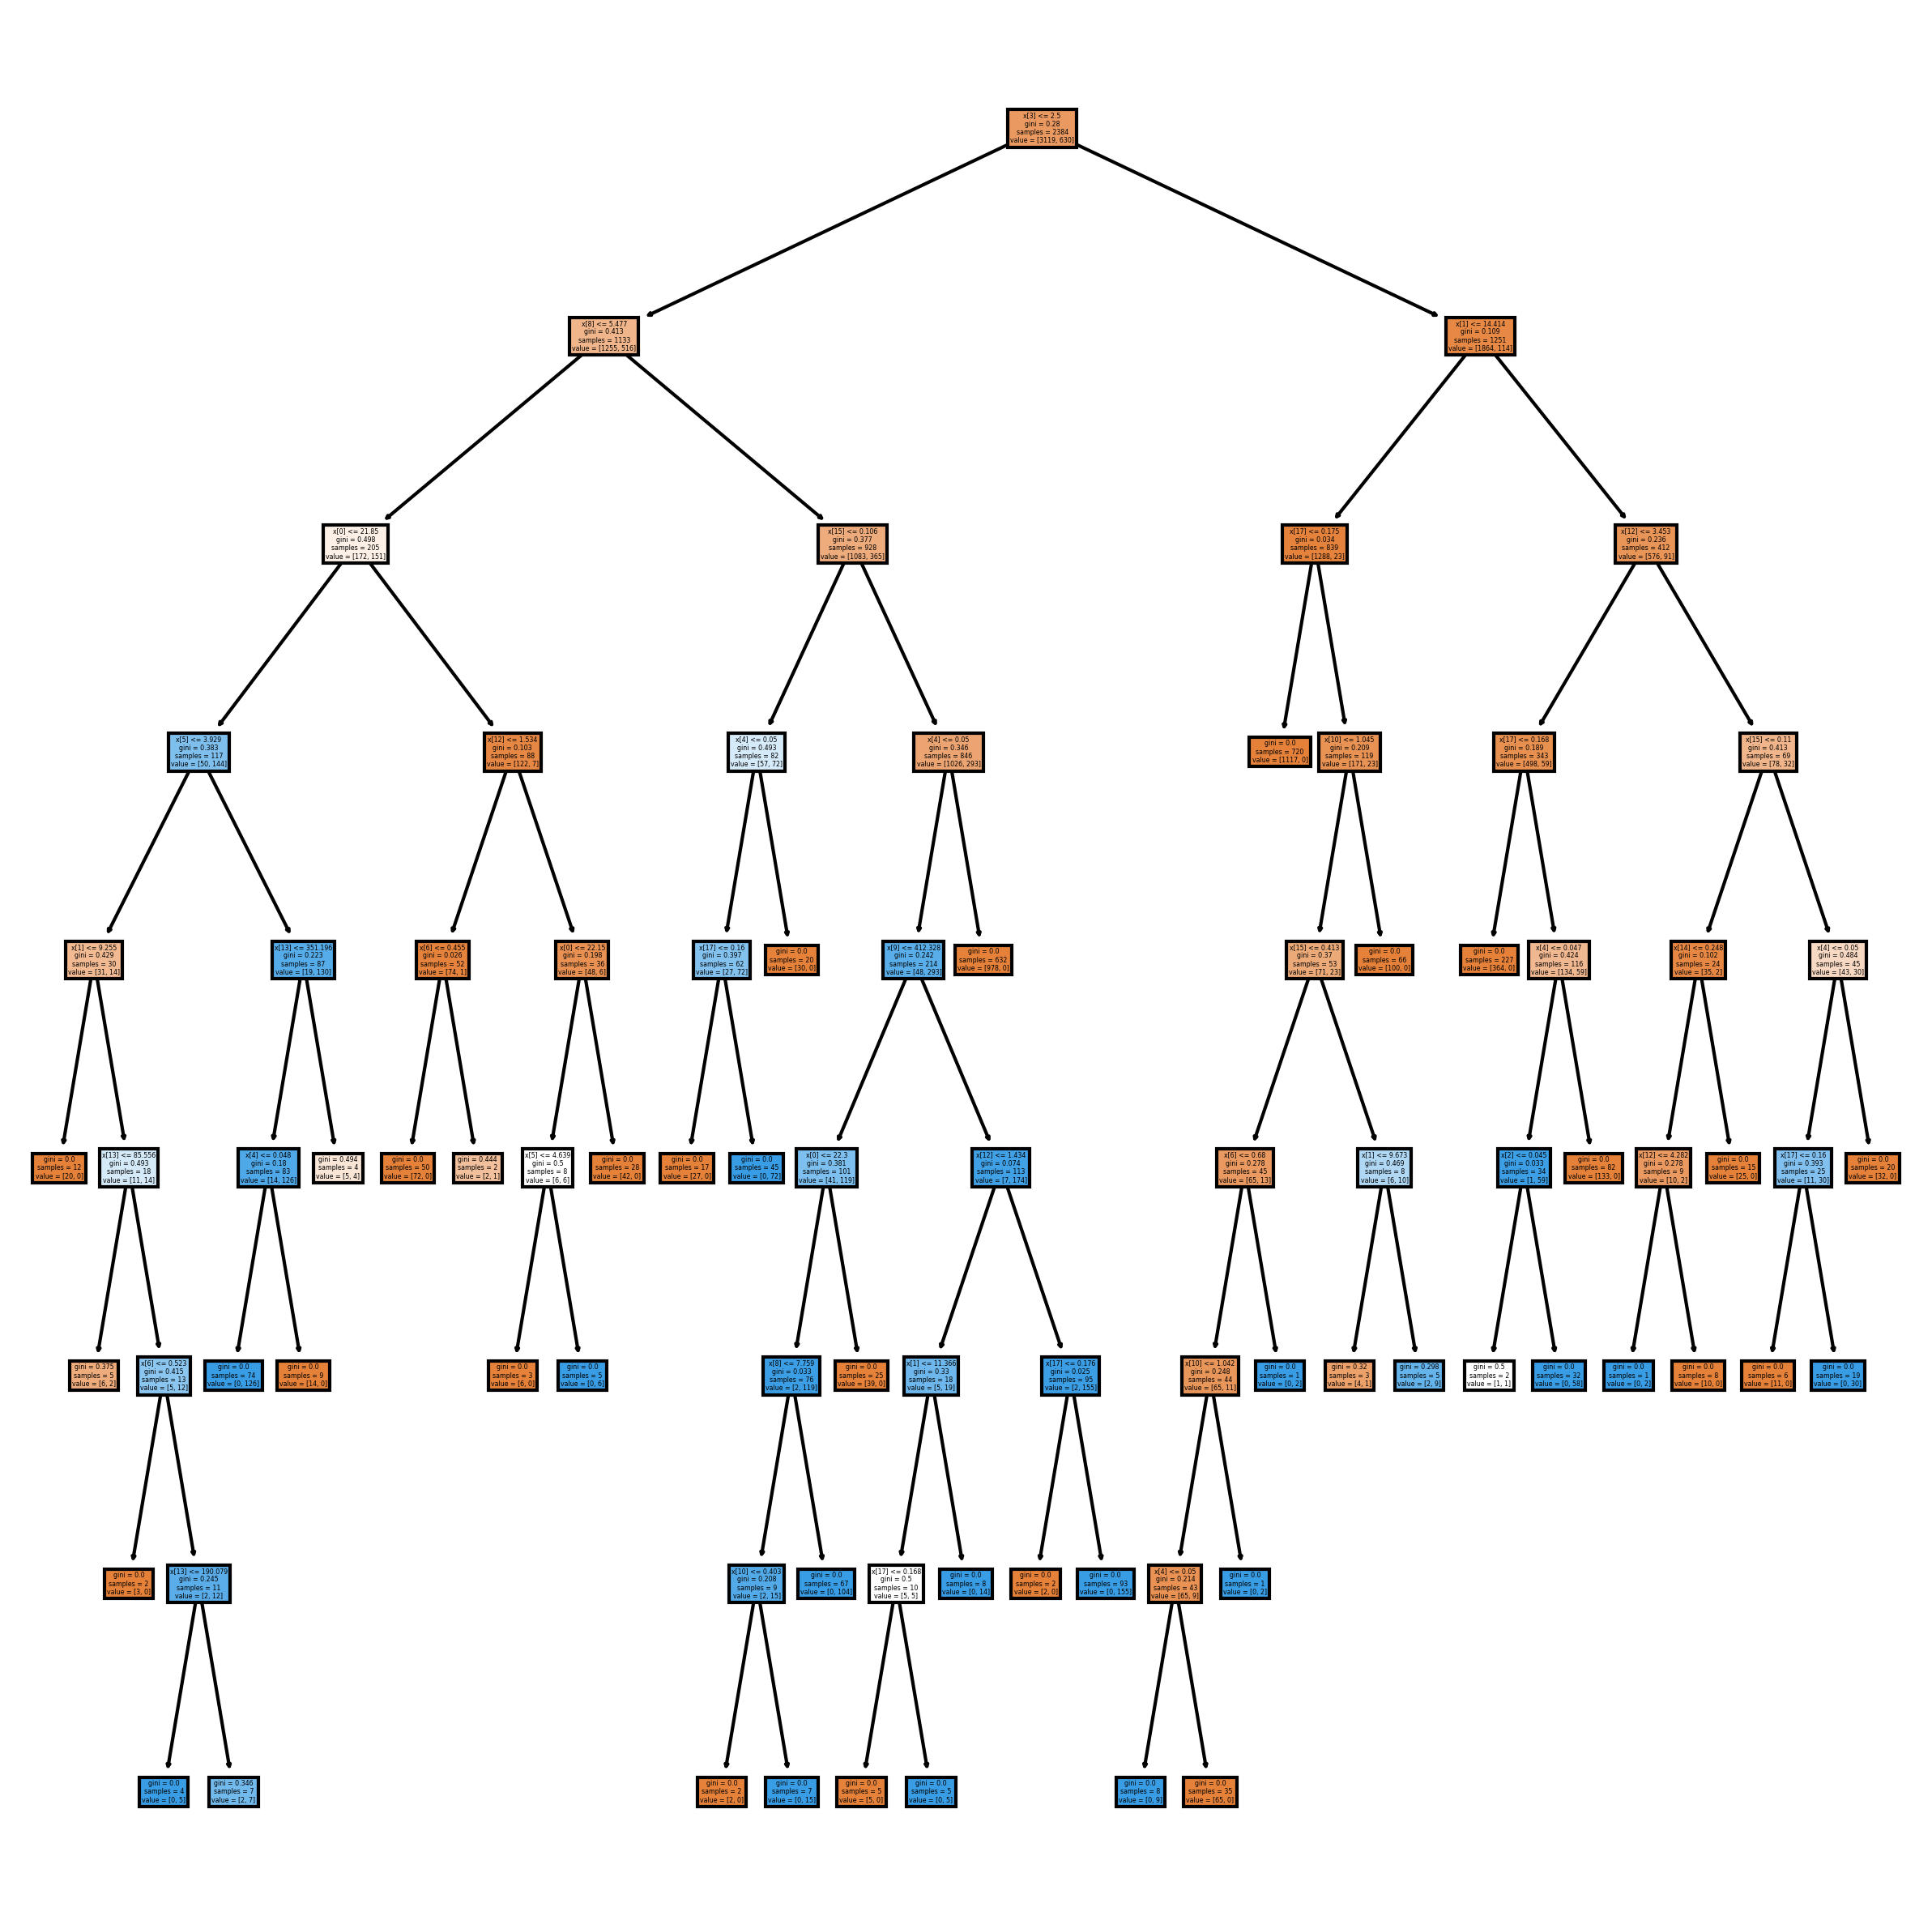

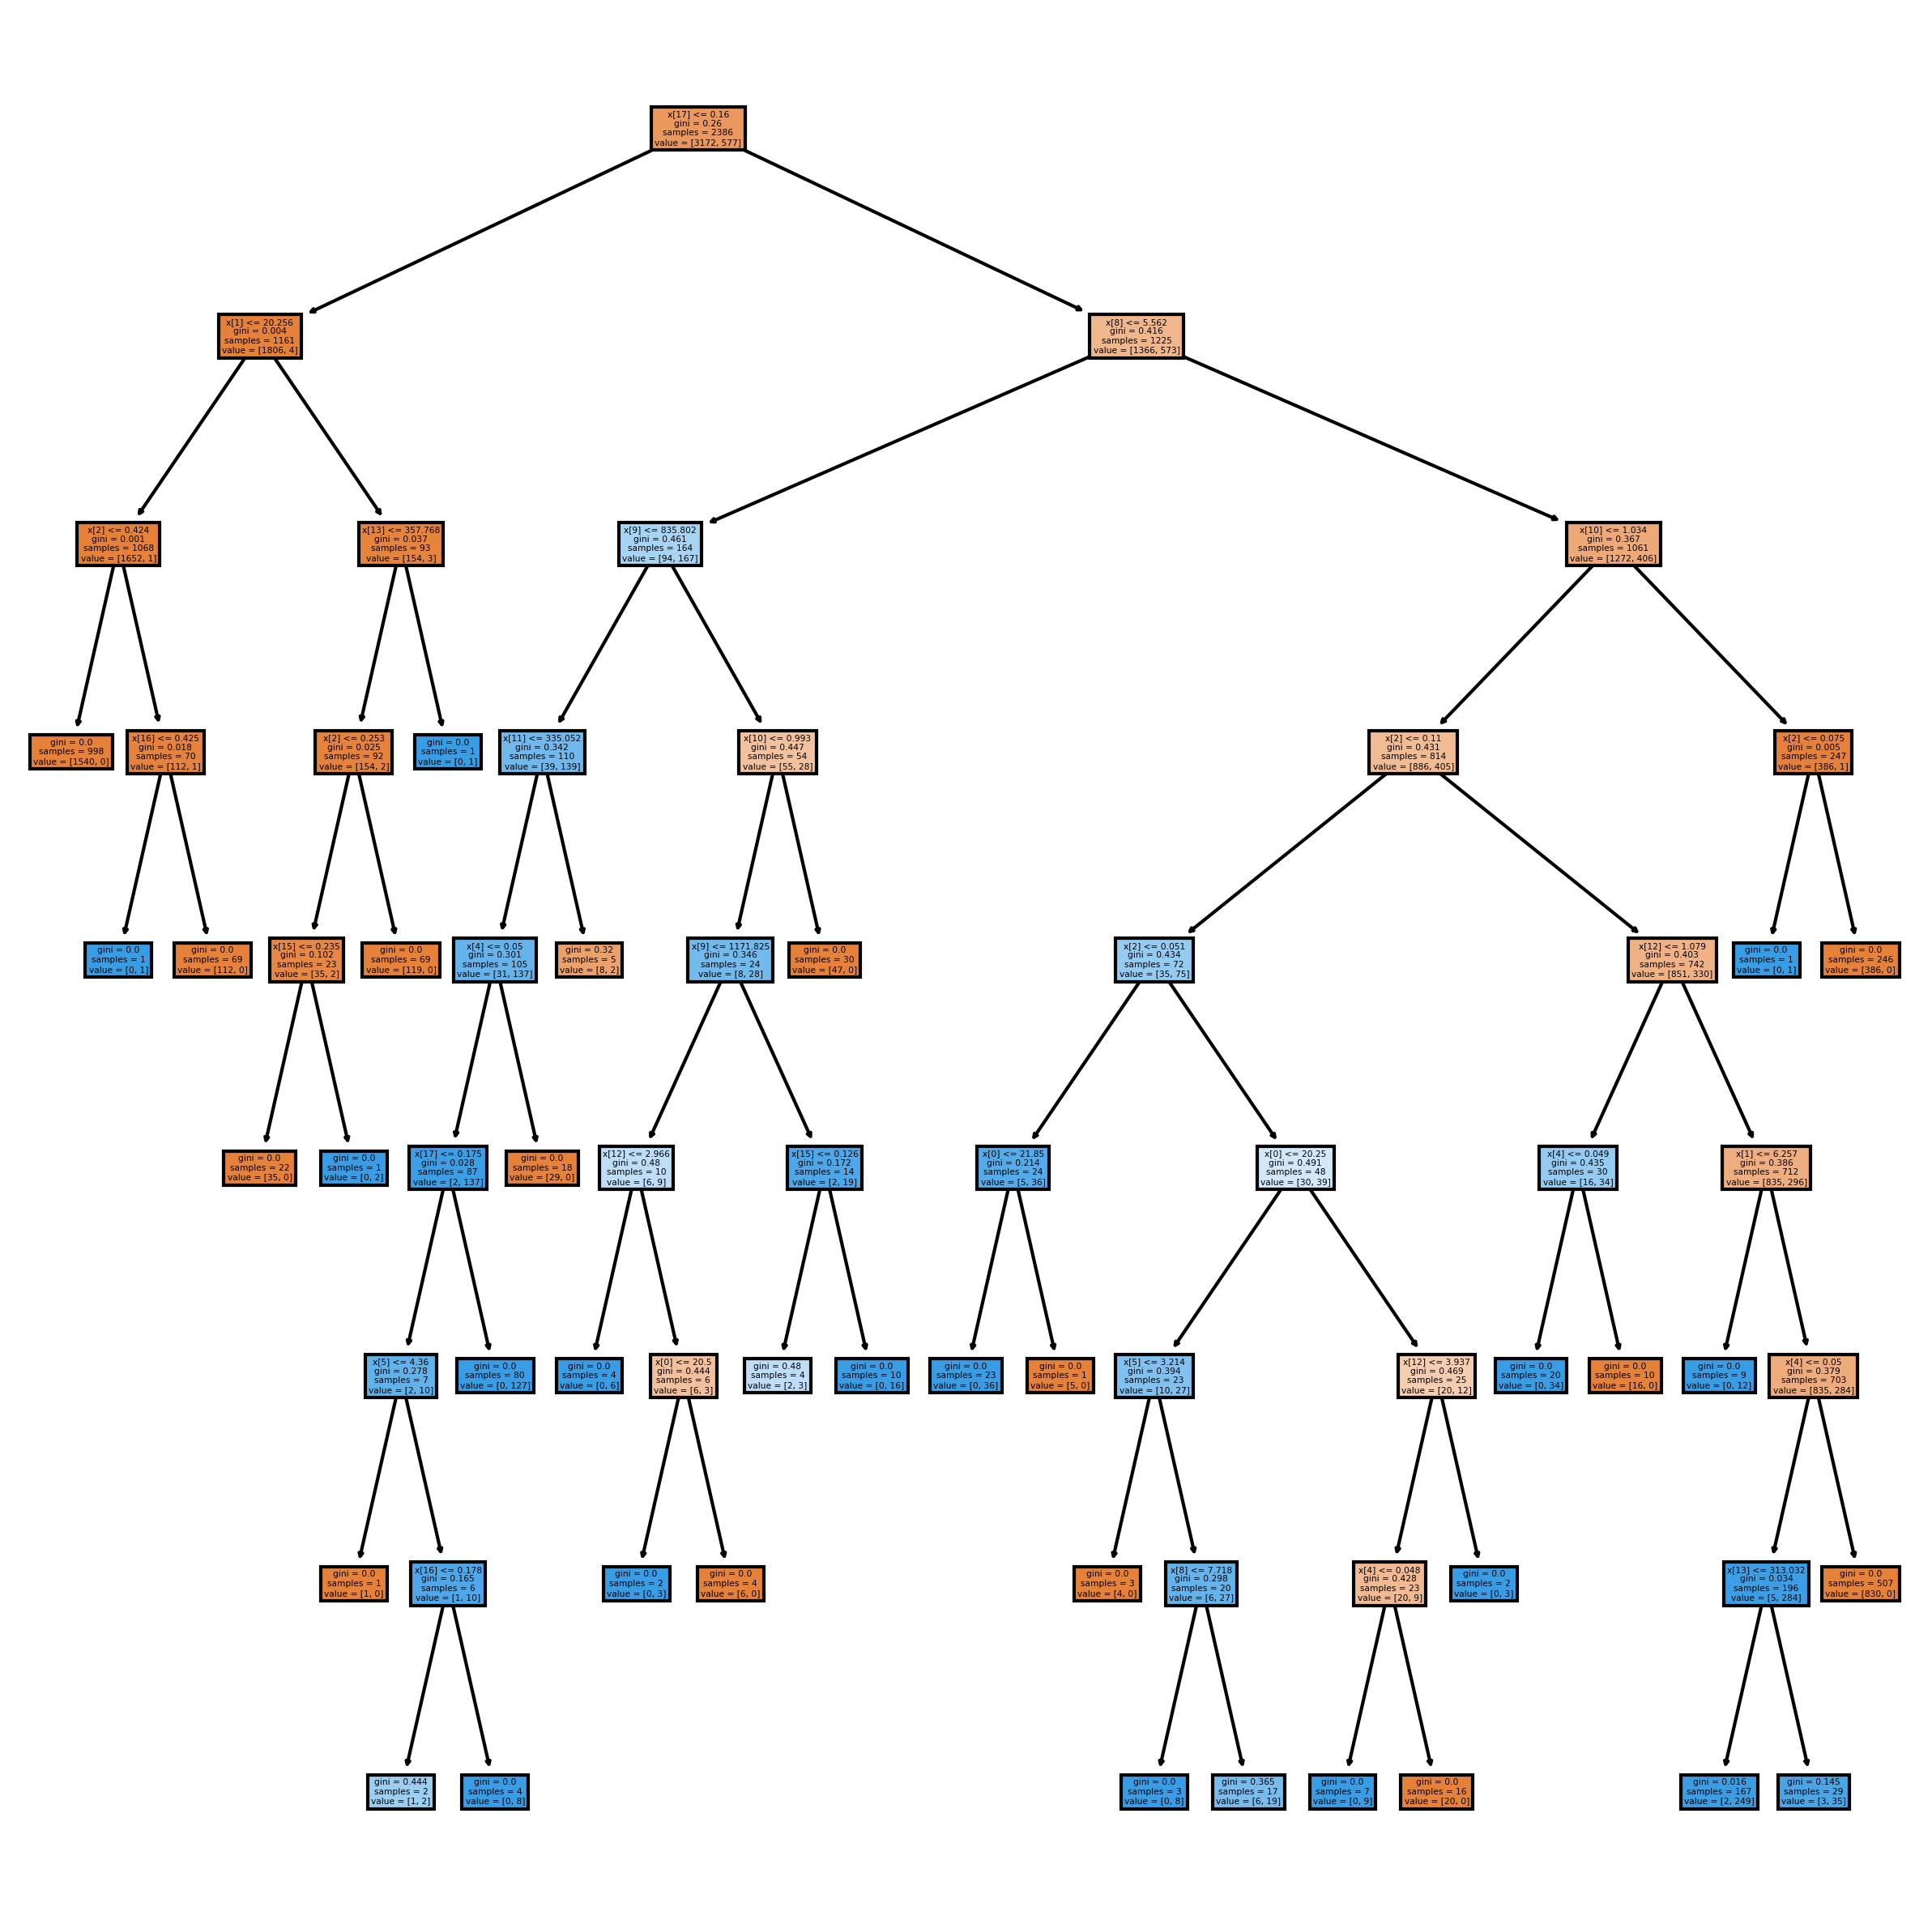

In [ ]:
# With this for loop it is possible to display the trees of the forest, we decided to plot the first 5.
for t in rf.estimators_[:5]:
    fig, ax = plt.subplots(figsize=(10, 10),dpi=300)
    plot_tree(t, filled=True, ax=ax)
plt.show()

This section allow us to determine which features overall are the most important in the Random Forest. from the chart it is clear that Minimum orbit intersection is the variable that mostly affects accuracy of our model. Removing it will drop accuracy of almost 25%.

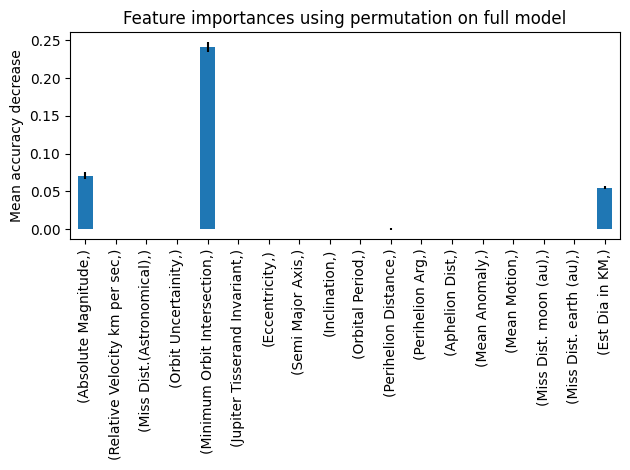

In [ ]:
imp= permutation_importance(rf, x_test_rf, y_test_rf)
feature_names = [cor_df.columns.values]
forest_importances = pd.Series(imp.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=imp.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

#### Grid Search

To find the optimal parameters we run a Grid search 

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4 ,5 ,6, 7, 8, 10, 12],
    'n_estimators': [10, 20, 30, 40, 50]
}



# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train_rf, y_train_rf)
print(grid_search.best_params_)



Fitting 3 folds for each of 3600 candidates, totalling 10800 fits
{'bootstrap': True, 'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 40}


###A.N.N.

The last model we tested is an Artificial Neural Network. We used a uniform initializer with ReLu function as our activation and sigmoid as our otuput function. Moreover we used adam as our model optimizer and binary_crossentropy as loss function. 

We used 23 as batch size (divisor of the number of observations of our dataset) and  125 epochs. 

All those hyperparameters were chosen after many tests and also based on common sense and accuracy. 

After the code you can also find the chart of the loss function of our model.

Epoch 1/125
163/163 [==============================] - 2s 4ms/step - loss: 0.5765 - accuracy: 0.8397 - recall: 0.0000e+00
Epoch 2/125
163/163 [==============================] - 1s 5ms/step - loss: 0.3010 - accuracy: 0.8397 - recall: 0.0000e+00
Epoch 3/125
163/163 [==============================] - 1s 5ms/step - loss: 0.2171 - accuracy: 0.8397 - recall: 0.0000e+00
Epoch 4/125
163/163 [==============================] - 1s 7ms/step - loss: 0.1575 - accuracy: 0.9349 - recall: 0.6223
Epoch 5/125
163/163 [==============================] - 1s 7ms/step - loss: 0.1168 - accuracy: 0.9755 - recall: 0.8952
Epoch 6/125
163/163 [==============================] - 1s 5ms/step - loss: 0.0888 - accuracy: 0.9837 - recall: 0.9334
Epoch 7/125
163/163 [==============================] - 1s 5ms/step - loss: 0.0686 - accuracy: 0.9848 - recall: 0.9484
Epoch 8/125
163/163 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9893 - recall: 0.9601
Epoch 9/125
163/163 [=======================

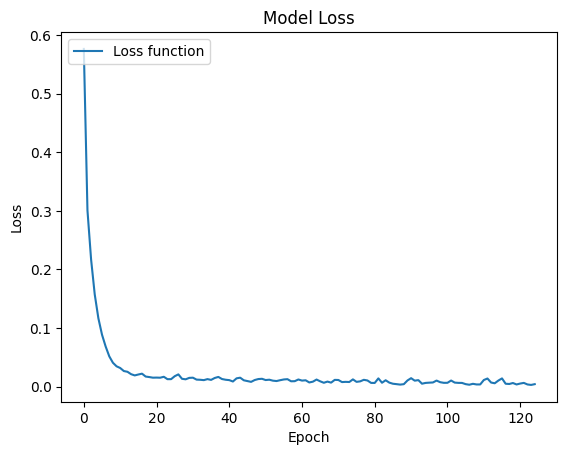

30/30 [==============================] - 0s 2ms/step


In [ ]:
#scaling train and test
scaler=StandardScaler()
x_train_ann = scaler.fit_transform(x_train_rf)
x_test_ann = scaler.transform(x_test_rf)


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(18, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
classifier.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fourth hidden layer
classifier.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fifth hidden layer
classifier.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy','Recall'])

# Fitting the ANN to the Training set
history =classifier.fit(x_train_ann, y_train_rf, batch_size = 23, epochs = 125)

# plot the loss function
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss function'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred_ann = classifier.predict(x_test_ann)
y_pred_ann = (y_pred_ann > 0.5)


#### A.N.N. metrics

In this section you will find all the different Metrics we used to check performance of the ANN. 

This model performs good but still not as good as the random forest model. 

We will have a closer look at how they compare in the next section

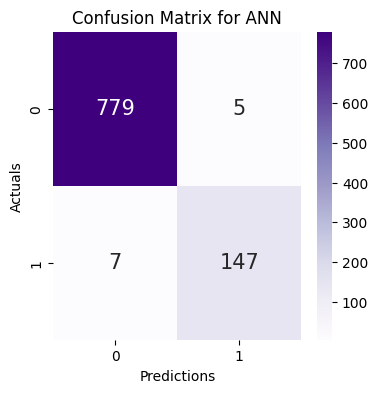

Ann accuracy: 0.9872068230277186
Ann precision: 0.9671052631578947
Ann recall: 0.9545454545454546
Ann F-1 score: 0.9607843137254902
Ann specificity: 0.9936224489795918


In [ ]:
cm_ann =metrics.confusion_matrix (y_test_rf, y_pred_ann)
plt.figure(figsize=(4,4))
sns.heatmap(cm_ann, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Purples, fmt='.3g')
plt.title('Confusion Matrix for ANN')
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.show()


ann_accuracy =accuracy_score(y_test_rf, y_pred_ann)
print('Ann accuracy:', ann_accuracy)

ann_precision= precision_score(y_test_rf, y_pred_ann)
print('Ann precision:', ann_precision)

ann_recall = recall_score(y_test_rf, y_pred_ann)
print('Ann recall:', ann_recall)

ann_f1= f1_score(y_test_rf, y_pred_ann)
print('Ann F-1 score:', ann_f1)

ann_specificity= specificity_score(y_test_rf, y_pred_ann)
print('Ann specificity:', ann_specificity)



##**CONCLUSIONS**

To conclude our work we wanted to have a closer look at how the model are compared to one another. We thus plotteed all the metrics in a single chart to have a better understanding of the situation.

In [ ]:
#preparing for visualizations
metrcs_lst=['Accuracy','Precision','Recall','F-1','Specificity']
lrb_stats = [accuracy_lr_bal*100,precision_lr_bal*100,recall_lr_bal*100,fi_lr_bal*100, specificity_lr_bal*100]
lru_stats =[accuracy_lr*100,precision_lr*100, recall_lr*100,fi_lr*100,specificity_lr*100]
rf_stats=[rf_accuracy*100, precision_rf*100, recall_rf*100,f1_rf*100,specificity_rf*100]
ann_stats=[ann_accuracy*100,ann_precision*100, ann_recall*100, ann_f1*100, ann_specificity*100]

We plotted the metrics of each model to easily understand which one is the best model.

Here we also include the logistic on unbalanced dataset but given its very bad performance we will remove it on the next section

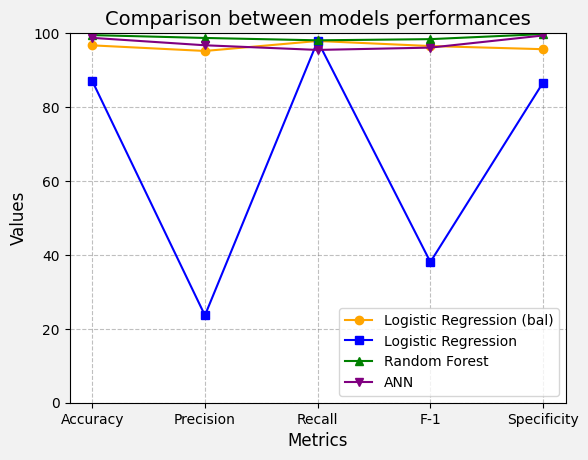

In [ ]:
f_fig, f_ax = plt.subplots()
f_ax.plot(metrcs_lst, lrb_stats, label='Logistic Regression (bal)', marker='o',color='orange')
f_ax.plot(metrcs_lst, lru_stats, label='Logistic Regression', marker='s',color='blue')
f_ax.plot(metrcs_lst, rf_stats, label='Random Forest', marker='^',color='green')
f_ax.plot(metrcs_lst, ann_stats, label='ANN', marker='v',color='purple')

# Add labels, title, and legend
f_ax.set_xlabel('Metrics', fontsize=12)
f_ax.set_ylabel('Values', fontsize=12)
f_ax.set_title('Comparison between models performances', fontsize=14)
f_ax.legend()

# Add grid lines
f_ax.grid(True, linestyle='--', color='grey', alpha=0.5)

# Adjust axis limits
f_ax.set_ylim([0, 100])

# Show graph with background color
f_fig.patch.set_facecolor('#f2f2f2')
plt.show()

Final look at all the metrics.

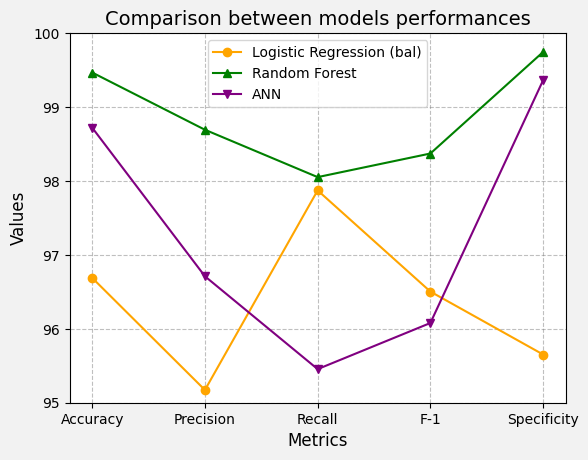

In [ ]:
fi_fig, fi_ax = plt.subplots()
fi_ax.plot(metrcs_lst, lrb_stats, label='Logistic Regression (bal)', marker='o',color='orange')
fi_ax.plot(metrcs_lst, rf_stats, label='Random Forest', marker='^',color='green')
fi_ax.plot(metrcs_lst, ann_stats, label='ANN', marker='v',color='purple')

# Add labels, title, and legend
fi_ax.set_xlabel('Metrics', fontsize=12)
fi_ax.set_ylabel('Values', fontsize=12)
fi_ax.set_title('Comparison between models performances', fontsize=14)
fi_ax.legend()

# Add grid lines
fi_ax.grid(True, linestyle='--', color='grey', alpha=0.5)

# Adjust axis limits
fi_ax.set_ylim([95, 100])

# Show graph with background color
fi_fig.patch.set_facecolor('#f2f2f2')
plt.show()

The best model in each metric is the Random Forest as we can che in the chart above


